## Датасет №1: [Объекты вокруг Земли](https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects).

### Описание датасета:
Данный набор данных представляет собой коллекцию сведений о ближайших к Земле объектах (астероидах), сертифицированных NASA. Он содержит данные, которые могут помочь идентифицировать потенциально опасные астероиды, которые могут оказать влияние на Землю или на космические миссии. Набор данных включает в себя такие ключевые характеристики астероидов, как их размер, скорость, расстояние до Земли и информация о возможной опасности столкновения.

---

### Анализ сведений:
**Проблемная область:**
Основной проблемной областью является отслеживание и оценка рисков, связанных с приближением астероидов к Земле. С помощью данных о движении и характеристиках астероидов можно предсказать возможные столкновения и минимизировать угрозу для Земли, планируя превентивные действия.

**Актуальность:**
Набор данных высокоактуален для задач оценки рисков от космических объектов, мониторинга космического пространства и разработки превентивных мер по защите Земли. Также он важен для научных исследований в области астрономии и планетарной безопасности.

**Объекты наблюдения:**
Объектами наблюдения в данном наборе данных являются астероиды, классифицированные NASA как "ближайшие к Земле объекты" (Near-Earth Objects, NEO). Эти объекты могут проходить в непосредственной близости от Земли, что потенциально представляет опасность.

**Атрибуты объектов:**
- id: Уникальный идентификатор астероида.
- name: Название, присвоенное астероиду NASA.
- est_diameter_min: Минимальный оценочные диаметры астероида в километрах.
- est_diameter_max: Максимальный оценочные диаметры астероида в километрах.
- relative_velocity: Скорость астероида относительно Земли (в км/с).
- miss_distance: Расстояние, на котором астероид пролетел мимо Земли, в километрах.
- orbiting_body: Планета, вокруг которой вращается астероид.
- sentry_object: Признак, указывающий на наличие астероида в системе автоматического мониторинга столкновений (система Sentry).
- absolute_magnitude: Абсолютная величина, описывающая яркость объекта.
- hazardous: Булев признак, указывающий, является ли астероид потенциально опасным.

**Связь между объектами:**
В данном наборе данных отсутствует явная связь между астероидами, однако на основе орбитальных параметров можно исследовать группы объектов, имеющие схожие орбиты или величины риска столкновения с Землей.

---

### Качество набора данных:
**Информативность:**
Датасет предоставляет важные сведения о ключевых характеристиках астероидов, такие как размер, скорость и расстояние от Земли, что позволяет проводить качественный анализ их потенциальной опасности.

**Степень покрытия:**
Набор данных включает данные о большом количестве астероидов (>90000 записей), что позволяет охватить значительную часть ближайших к Земле объектов. Однако не все астероиды могут быть обнаружены, так как данные зависят от возможности их наблюдения.

**Соответствие реальным данным:**
Данные в наборе предоставлены NASA, что указывает на высокую достоверность и актуальность информации. Тем не менее, параметры, такие как диаметр и расстояние, могут быть оценочными и подвергаться уточнению с новыми наблюдениями.

**Согласованность меток:**
Метрики в датасете четко обозначены, а булевы признаки, такие как "hazardous" (опасен или нет), соответствуют конкретным параметрам астероидов и легко интерпретируются.

---

### Бизес-цели:
1. **Мониторинг космических угроз:**
Создание системы, которая анализирует астероиды и предсказывает риски столкновения с Землей, помогая государственным агентствам и частным компаниям разрабатывать превентивные меры.
2. **Поддержка космических миссий:**
Предоставление точных данных для планирования и безопасного проведения космических миссий, минимизация рисков столкновения с космическими объектами.
3. **Образовательные и научные исследования:**
Использование данных для поддержки образовательных программ и научных исследований в области астрономии и космической безопасности.

**Эффект для бизнеса:**
Набор данных способствует развитию технологий космической безопасности, минимизирует финансовые риски от потенциальных катастроф и поддерживает стратегическое планирование космических миссий.

---

### Технические цели:
1. **Моделирование риска столкновения:**
Построение алгоритмов машинного обучения для прогнозирования вероятности столкновения астероидов с Землей.
2. **Анализ и кластеризация астероидов:**
Исследование взаимосвязей между астероидами, анализ орбитальных данных и выделение групп астероидов, имеющих схожие характеристики.
3. **Оптимизация системы предупреждения угроз:**
Создание системы раннего оповещения, которая будет автоматически анализировать данные и предупреждать о потенциальных угрозах в реальном времени.

**Входные данные:**
Диаметр, скорость, расстояние, орбитальные параметры астероидов.

**Целевой признак:**
Признак "hazardous" – бинарная метка, указывающая на потенциальную опасность астероида.

---

### Выгрузка данных из файла в DataFrame:

In [1]:
from typing import Any
from math import ceil

import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


df: DataFrame = pd.read_csv('..//static//csv//neo.csv')

### Краткая информация о DataFrame:

In [2]:
# Краткая информация о DataFrame
df.info()

# Статистическое описание числовых столбцов
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


count          mean           std           min  \
id                  90836.0  1.438288e+07  2.087202e+07  2.000433e+06   
est_diameter_min    90836.0  1.274321e-01  2.985112e-01  6.089126e-04   
est_diameter_max    90836.0  2.849469e-01  6.674914e-01  1.361570e-03   
relative_velocity   90836.0  4.806692e+04  2.529330e+04  2.033464e+02   
miss_distance       90836.0  3.706655e+07  2.235204e+07  6.745533e+03   
absolute_magnitude  90836.0  2.352710e+01  2.894086e+00  9.230000e+00   

                             25%           50%           75%           max  
id                  3.448110e+06  3.748362e+06  3.884023e+06  5.427591e+07  
est_diameter_min    1.925551e-02  4.836765e-02  1.434019e-01  3.789265e+01  
est_diameter_max    4.305662e-02  1.081534e-01  3.206564e-01  8.473054e+01  
relative_velocity   2.861902e+04  4.419012e+04  6.292360e+04  2.369901e+05  
miss_distance       1.721082e+07  3.784658e+07  5.654900e+07  7.479865e+07  
absolute_magnitude  2.134000e+01  2.370000e+01  2.570000e+01  3.320000e+01

### Проблема пропущенных данных:

**Проблема пропущенных данных** — это отсутствие значений в наборе данных, что может искажать результаты анализа и статистические выводы.

Проверка на отсутствие значений, представленная ниже, показала, что DataFrame не имеет пустых значений признаков. Нет необходимости использовать методы заполнения пропущенных данных.

In [3]:
# Проверка пропущенных данных
def check_null_columns(dataframe: DataFrame) -> None:
    # Присутствуют ли пустые значения признаков
    print('Присутствуют ли пустые значения признаков в колонке:')
    print(dataframe.isnull().any(), '\n')

    # Количество пустых значений признаков
    print('Количество пустых значений признаков в колонке:')
    print(dataframe.isnull().sum(), '\n')

    # Процент пустых значений признаков
    print('Процент пустых значений признаков в колонке:')
    for column in dataframe.columns:
        null_rate: float = dataframe[column].isnull().sum() / len(dataframe) * 100
        if null_rate > 0:
            print(f"{column} процент пустых значений: {null_rate:.2f}%")
    print()
            

# Проверка пропущенных данных
check_null_columns(df)

Присутствуют ли пустые значения признаков в колонке:
id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool 

Количество пустых значений признаков в колонке:
id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64 

Процент пустых значений признаков в колонке:



### Проблема зашумленности данных:

**Зашумленность** – это наличие случайных ошибок или вариаций в данных, которые могут затруднить выявление истинных закономерностей. Шум может возникать из-за ошибок измерений, неправильных записей или других факторов.

**Выбросы** – это значения, которые значительно отличаются от остальных наблюдений в наборе данных. Выбросы могут указывать на ошибки в данных или на редкие, но важные события. Их наличие может повлиять на статистические методы анализа.

Представленный ниже код помогает определить наличие выбросов в наборе данных и устранить их (при наличии), заменив значения ниже нижней границы (рассматриваемого минимума) на значения нижней границы, а значения выше верхней границы (рассматриваемого максимума) – на значения верхней границы.

Проверка наличия выбросов в колонках:
Колонка est_diameter_min:
	Есть выбросы: Да
	Количество выбросов: 8306
	Минимальное значение: 0.0006089126
	Максимальное значение: 37.8926498379
	1-й квартиль (Q1): 0.0192555078
	3-й квартиль (Q3): 0.1434019235

Колонка est_diameter_max:
	Есть выбросы: Да
	Количество выбросов: 8306
	Минимальное значение: 0.00136157
	Максимальное значение: 84.7305408852
	1-й квартиль (Q1): 0.0430566244
	3-й квартиль (Q3): 0.320656449

Колонка relative_velocity:
	Есть выбросы: Да
	Количество выбросов: 1574
	Минимальное значение: 203.34643253
	Максимальное значение: 236990.1280878666
	1-й квартиль (Q1): 28619.02064490995
	3-й квартиль (Q3): 62923.60463276395

Колонка miss_distance:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 6745.532515957
	Максимальное значение: 74798651.4521972
	1-й квартиль (Q1): 17210820.23576468
	3-й квартиль (Q3): 56548996.45139917

Колонка absolute_magnitude:
	Есть выбросы: Да
	Количество выбросов: 101
	Минимальное значени

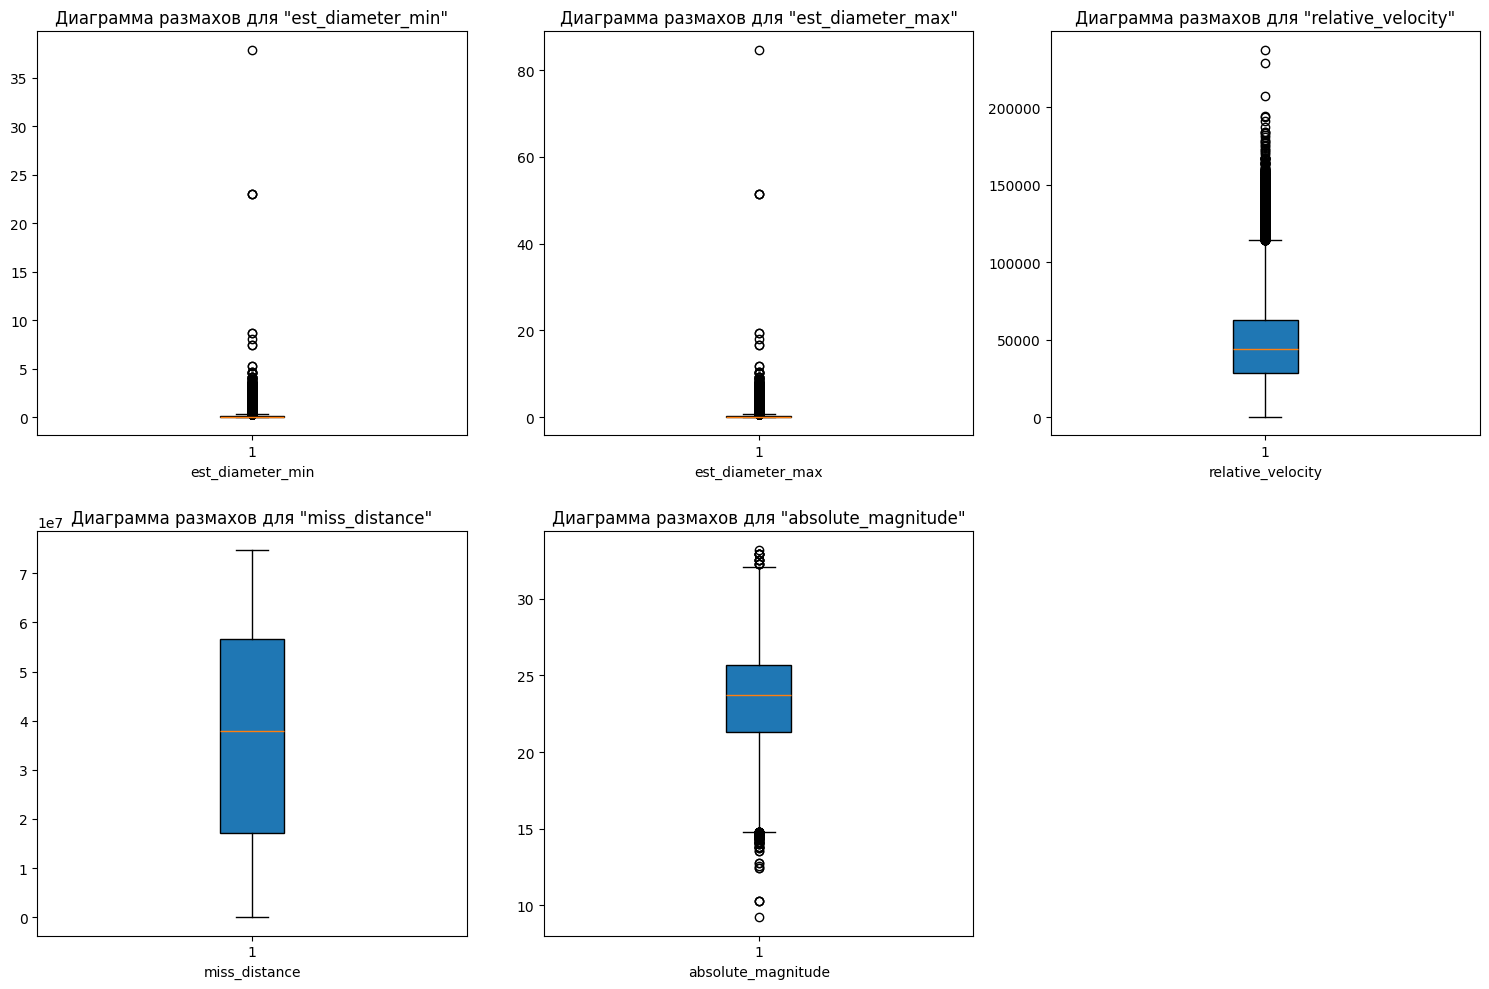

In [4]:
# Проверка выбросов в DataFrame
def check_outliers(dataframe: DataFrame, columns: list[str]) -> None:
    for column in columns:
        if not pd.api.types.is_numeric_dtype(dataframe[column]): # Проверяем, является ли колонка числовой
            continue
        
        Q1: float = dataframe[column].quantile(0.25) # 1-й квартиль (25%)
        Q3: float = dataframe[column].quantile(0.75) # 3-й квартиль (75%)
        IQR: float = Q3 - Q1 # Вычисляем межквартильный размах

        # Определяем границы для выбросов
        lower_bound: float = Q1 - 1.5 * IQR # Нижняя граница
        upper_bound: float = Q3 + 1.5 * IQR # Верхняя граница

        # Подсчитываем количество выбросов
        outliers: DataFrame = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        outlier_count: int = outliers.shape[0]

        print(f"Колонка {column}:")
        print(f"\tЕсть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"\tКоличество выбросов: {outlier_count}")
        print(f"\tМинимальное значение: {dataframe[column].min()}")
        print(f"\tМаксимальное значение: {dataframe[column].max()}")
        print(f"\t1-й квартиль (Q1): {Q1}")
        print(f"\t3-й квартиль (Q3): {Q3}\n")

# Визуализация выбросов
def visualize_outliers(dataframe: DataFrame, columns: list[str]) -> None:
    # Диаграммы размахов
    plt.figure(figsize=(15, 10))
    rows: int = ceil(len(columns) / 3)
    for index, column in enumerate(columns, 1):
        plt.subplot(rows, 3, index)
        plt.boxplot(dataframe[column], vert=True, patch_artist=True)
        plt.title(f"Диаграмма размахов для \"{column}\"")
        plt.xlabel(column)
            
    # Отображение графиков
    plt.tight_layout()
    plt.show()


# Числовые столбцы DataFrame
numeric_columns: list[str] = [
    'est_diameter_min',
    'est_diameter_max', 
    'relative_velocity', 
    'miss_distance', 
    'absolute_magnitude'
]

# Проверка наличия выбросов в колонках
print('Проверка наличия выбросов в колонках:')
check_outliers(df, numeric_columns)
visualize_outliers(df, numeric_columns)

Проверка наличия выбросов в колонках после их устранения:
Колонка est_diameter_min:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 0.0006089126
	Максимальное значение: 0.32962154705
	1-й квартиль (Q1): 0.0192555078
	3-й квартиль (Q3): 0.1434019235

Колонка est_diameter_max:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 0.00136157
	Максимальное значение: 0.7370561859
	1-й квартиль (Q1): 0.0430566244
	3-й квартиль (Q3): 0.320656449

Колонка relative_velocity:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 203.34643253
	Максимальное значение: 114380.48061454494
	1-й квартиль (Q1): 28619.02064490995
	3-й квартиль (Q3): 62923.60463276395

Колонка miss_distance:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 6745.532515957
	Максимальное значение: 74798651.4521972
	1-й квартиль (Q1): 17210820.23576468
	3-й квартиль (Q3): 56548996.45139917

Колонка absolute_magnitude:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минима

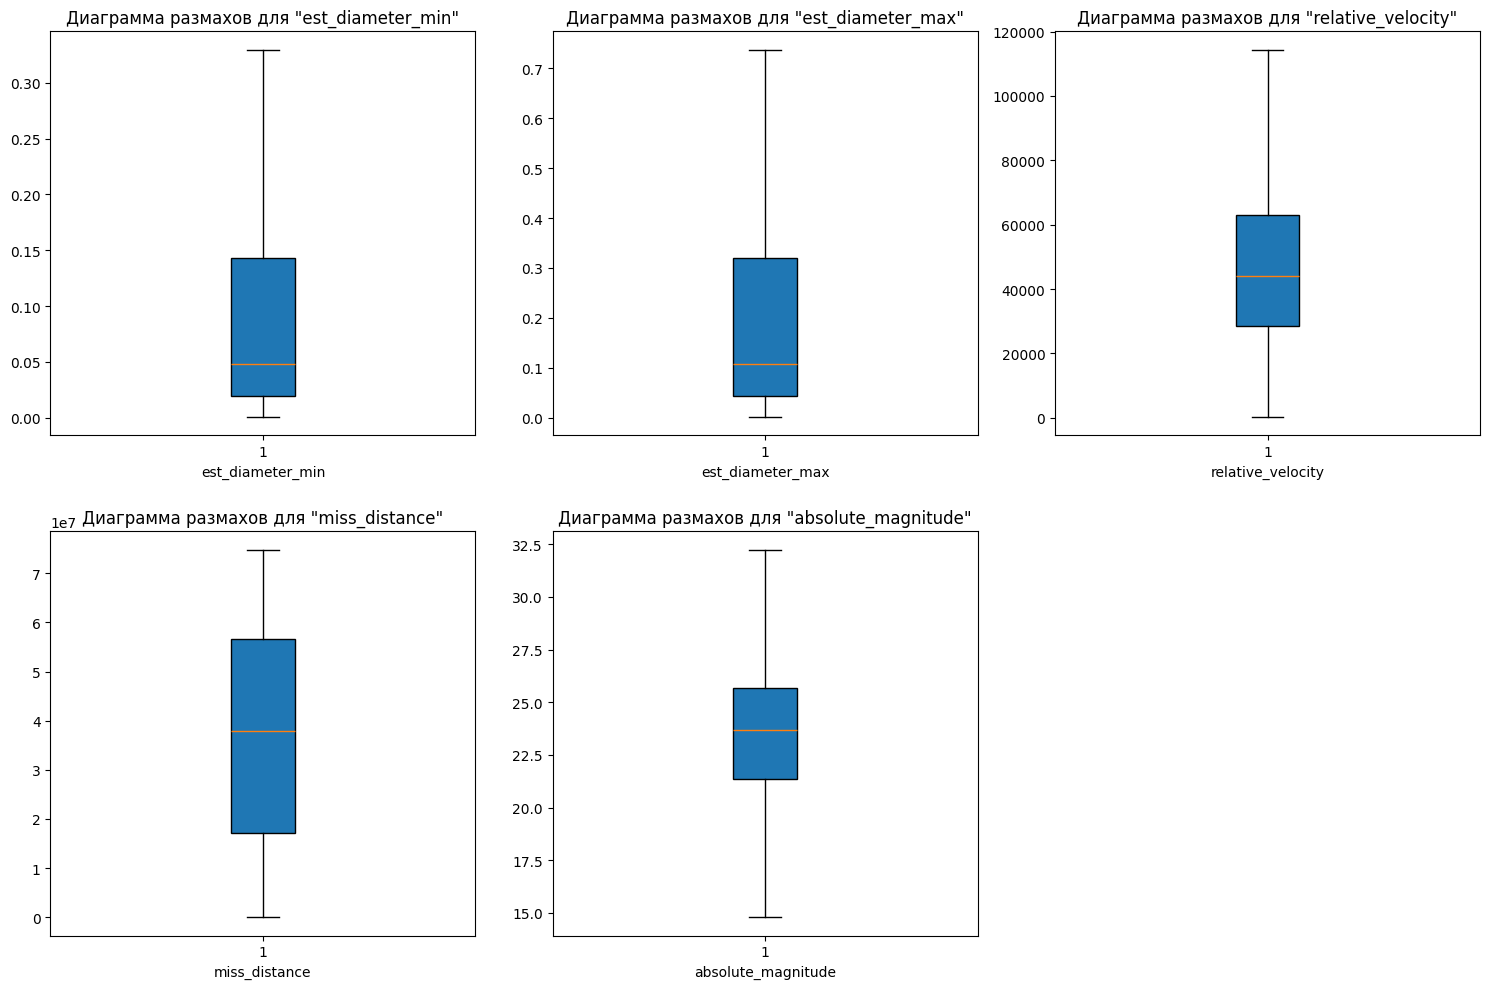

In [5]:
# Устранить выборсы в DataFrame
def remove_outliers(dataframe: DataFrame, columns: list[str]) -> DataFrame:
    for column in columns:
        if not pd.api.types.is_numeric_dtype(dataframe[column]): # Проверяем, является ли колонка числовой
            continue
        
        Q1: float = dataframe[column].quantile(0.25) # 1-й квартиль (25%)
        Q3: float = dataframe[column].quantile(0.75) # 3-й квартиль (75%)
        IQR: float = Q3 - Q1 # Вычисляем межквартильный размах

        # Определяем границы для выбросов
        lower_bound: float = Q1 - 1.5 * IQR # Нижняя граница
        upper_bound: float = Q3 + 1.5 * IQR # Верхняя граница

        # Устраняем выбросы:
        # Заменяем значения ниже нижней границы на нижнюю границу
        # А значения выше верхней границы – на верхнюю
        dataframe[column] = dataframe[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return dataframe


# Устраняем выборсы
df: DataFrame = remove_outliers(df, numeric_columns)

# Проверка наличия выбросов в колонках
print('Проверка наличия выбросов в колонках после их устранения:')
check_outliers(df, numeric_columns)
visualize_outliers(df, numeric_columns)

### Разбиение набора данных на выборки:

**Групповое разбиение данных** – это метод разделения данных на несколько групп или подмножеств на основе определенного признака или характеристики. При этом наблюдения для одного объекта должны попасть только в одну выборку.

**Основные виды выборки данных**:
1. Обучающая выборка (60-80%). Обучение модели (подбор коэффициентов некоторой математической функции для аппроксимации).
2. Контрольная выборка (10-20%). Выбор метода обучения, настройка гиперпараметров.
3. Тестовая выборка (10-20% или 20-30%). Оценка качества модели перед передачей заказчику.

Разделим выборку данных на 3 группы и проанализируем качество распределения данных.

Весь набор данных состоит из 90836 объектов, из которых 81996 (около 90.3%) неопасны (False), а 8840 (около 9.7%) опасны (True). Это говорит о том, что класс "неопасные" значительно преобладает.

Все выборки показывают одинаковое распределение классов, что свидетельствует о том, что данные были отобраны случайным образом и не содержат явного смещения.

Однако, несмотря на сбалансированность при разбиении данных, в целом данные обладают значительным дисбалансом между классами. Это может быть проблемой при обучении модели, так как она может иметь тенденцию игнорировать опасные объекты (True), что следует учитывать при дальнейшем анализе и выборе методов обработки данных.

Для получения более сбалансированных выборок данных необходимо воспользоваться методами приращения (аугментации) данных, а именно методами oversampling и undersampling.

In [6]:
# Функция для создания выборок
def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
) -> tuple[Any, Any, Any]:
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X: DataFrame = df_input # Contains all columns.
    y: DataFrame = df_input[
        [stratify_colname]
    ] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, 
        stratify=y, 
        test_size=(1.0 - frac_train), 
        random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test: float = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

Распределение количества наблюдений по меткам (классам):
hazardous
False    81996
True      8840
Name: count, dtype: int64 

Проверка сбалансированности выборок:
Обучающая выборка:  (54501, 10)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
False    49197
True      5304
Name: count, dtype: int64
Процент объектов класса "False": 90.27%
Процент объектов класса "True": 9.73%

Контрольная выборка:  (18167, 10)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
False    16399
True      1768
Name: count, dtype: int64
Процент объектов класса "False": 90.27%
Процент объектов класса "True": 9.73%

Тестовая выборка:  (18168, 10)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
False    16400
True      1768
Name: count, dtype: int64
Процент объектов класса "False": 90.27%
Процент объектов класса "True": 9.73%

Проверка необходимости аугментации выборок:
Для обучающей выборки аугментация данных требуется
Для контрольной выб

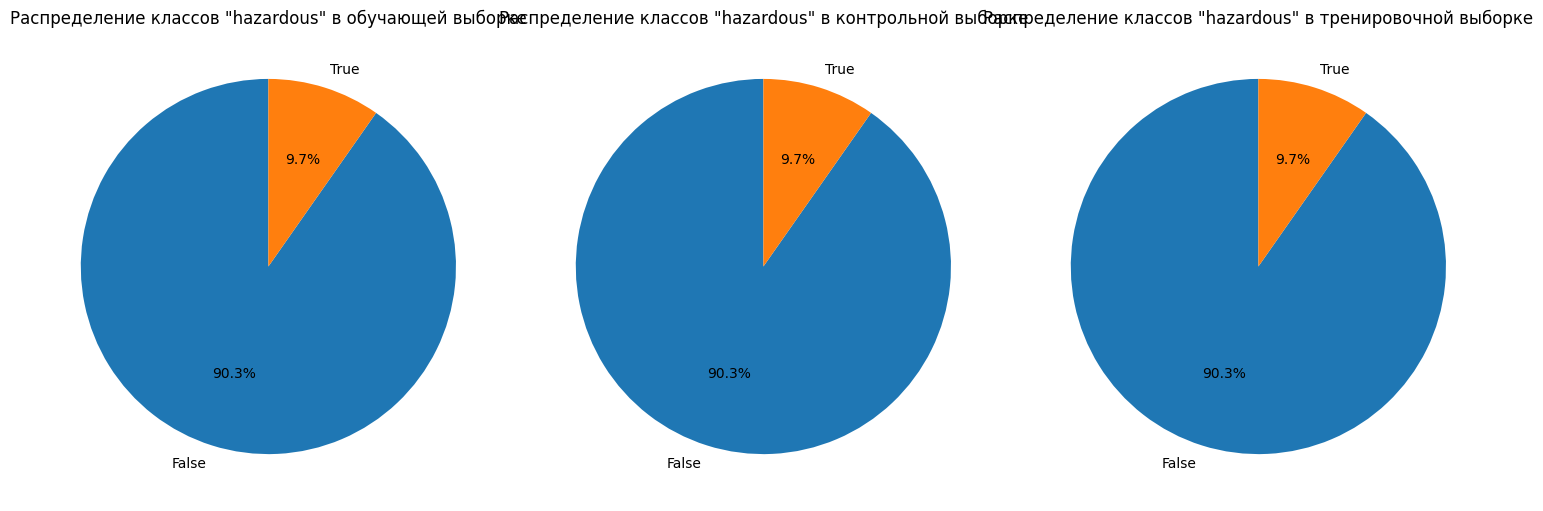

In [7]:
# Оценка сбалансированности
def check_balance(dataframe: DataFrame, dataframe_name: str, column: str) -> None:
    counts: Series[int] = dataframe[column].value_counts()
    print(dataframe_name + ": ", dataframe.shape)
    print(f"Распределение выборки данных по классам в колонке \"{column}\":\n", counts)
    total_count: int = len(dataframe)
    for value in counts.index:
        percentage: float = counts[value] / total_count * 100
        print(f"Процент объектов класса \"{value}\": {percentage:.2f}%")
    print()
   
# Определение необходимости аугментации данных
def need_augmentation(dataframe: DataFrame,
                      column: str, 
                      first_value: Any, second_value: Any) -> bool:
    counts: Series[int] = dataframe[column].value_counts()
    ratio: float = counts[first_value] / counts[second_value]
    return ratio > 1.5 or ratio < 0.67
 
 # Визуализация сбалансированности классов
def visualize_balance(dataframe_train: DataFrame,
                      dataframe_val: DataFrame,
                      dataframe_test: DataFrame, 
                      column: str) -> None:
   fig, axes = plt.subplots(1, 3, figsize=(15, 5))

   # Обучающая выборка
   counts_train: Series[int] = dataframe_train[column].value_counts()
   axes[0].pie(counts_train, labels=counts_train.index, autopct='%1.1f%%', startangle=90)
   axes[0].set_title(f"Распределение классов \"{column}\" в обучающей выборке")

   # Контрольная выборка
   counts_val: Series[int] = dataframe_val[column].value_counts()
   axes[1].pie(counts_val, labels=counts_val.index, autopct='%1.1f%%', startangle=90)
   axes[1].set_title(f"Распределение классов \"{column}\" в контрольной выборке")

   # Тестовая выборка
   counts_test: Series[int] = dataframe_test[column].value_counts()
   axes[2].pie(counts_test, labels=counts_test.index, autopct='%1.1f%%', startangle=90)
   axes[2].set_title(f"Распределение классов \"{column}\" в тренировочной выборке")

   # Отображение графиков
   plt.tight_layout()
   plt.show()
 

# Вывод распределения количества наблюдений по меткам (классам)
print('Распределение количества наблюдений по меткам (классам):')
print(df.hazardous.value_counts(), '\n')

df_train, df_val, df_test = split_stratified_into_train_val_test(
   df, 
   stratify_colname="hazardous", 
   frac_train=0.60, 
   frac_val=0.20, 
   frac_test=0.20
)

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок:')
check_balance(df_train, 'Обучающая выборка', 'hazardous')
check_balance(df_val, 'Контрольная выборка', 'hazardous')
check_balance(df_test, 'Тестовая выборка', 'hazardous')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train, 'hazardous', True, False) else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val, 'hazardous', True, False) else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test, 'hazardous', True, False) else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train, df_val, df_test, 'hazardous')

### Приращение данных:

**Аугментация данных** может быть полезна в том случае, когда имеется недостаточное количество данных и мы хотим сгенерировать новые данные на основе имеющихся, слегка модифицировав их.

**Методы решения:**
1. **Выборка с избытком (oversampling).** Копирование наблюдений или генерация новых наблюдений на основе существующих с помощью алгоритмов SMOTE и ADASYN (нахождение k-ближайших соседей).
2. **Выборка с недостатком (undersampling).** Исключение некоторых наблюдений для меток с большим количеством наблюдений. Наблюдения можно исключать случайным образом или на основе определения связей Томека для наблюдений разных меток.

Проверка сбалансированности выборок после применения метода oversampling:
Обучающая выборка:  (99094, 21839)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
True     49897
False    49197
Name: count, dtype: int64
Процент объектов класса "True": 50.35%
Процент объектов класса "False": 49.65%

Контрольная выборка:  (33065, 11737)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
True     16666
False    16399
Name: count, dtype: int64
Процент объектов класса "True": 50.40%
Процент объектов класса "False": 49.60%

Тестовая выборка:  (33123, 11819)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
True     16723
False    16400
Name: count, dtype: int64
Процент объектов класса "True": 50.49%
Процент объектов класса "False": 49.51%

Проверка необходимости аугментации выборок после применения метода oversampling:
Для обучающей выборки аугментация данных не требуется
Для контрольной выборки аугментация данных не требуется

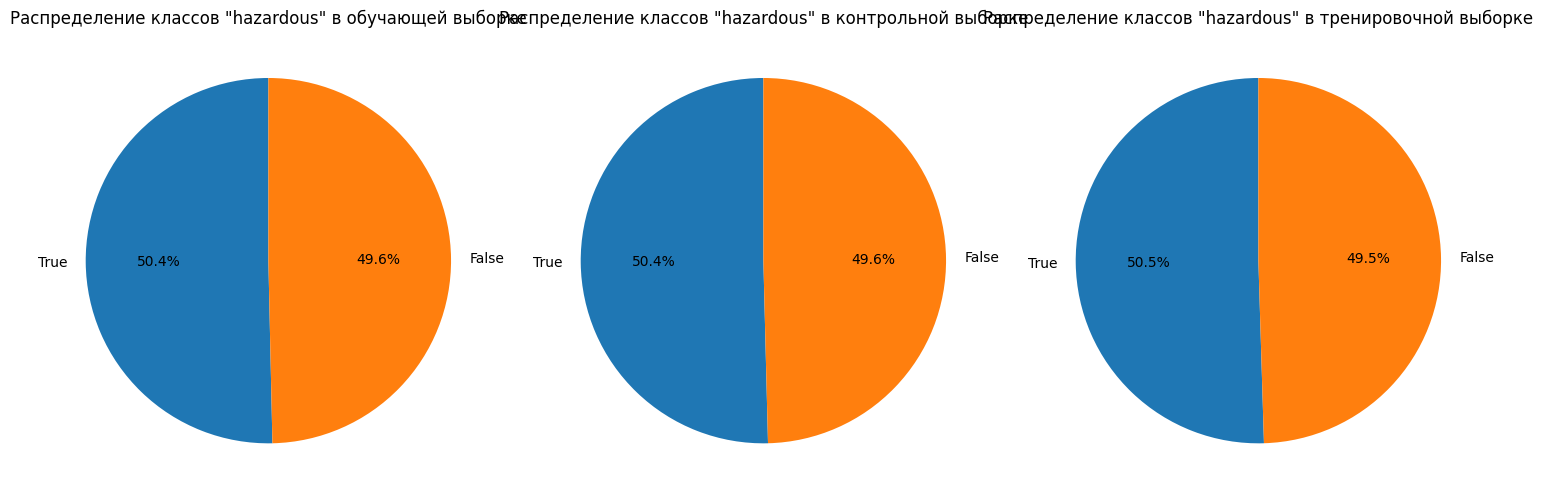

In [8]:
# Метод приращения с избытком (oversampling)
def oversample(df: DataFrame, column: str) -> DataFrame:
    X: DataFrame = pd.get_dummies(df.drop(column, axis=1))
    y: DataFrame = df[column] # type: ignore
    
    adasyn = ADASYN()
    X_resampled, y_resampled = adasyn.fit_resample(X, y) # type: ignore
    
    df_resampled: DataFrame = pd.concat([X_resampled, y_resampled], axis=1)
    return df_resampled


# Приращение данных (oversampling)
df_train_oversampled: DataFrame = oversample(df_train, 'hazardous')
df_val_oversampled: DataFrame = oversample(df_val, 'hazardous')
df_test_oversampled: DataFrame = oversample(df_test, 'hazardous')

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок после применения метода oversampling:')
check_balance(df_train_oversampled, 'Обучающая выборка', 'hazardous')
check_balance(df_val_oversampled, 'Контрольная выборка', 'hazardous')
check_balance(df_test_oversampled, 'Тестовая выборка', 'hazardous')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок после применения метода oversampling:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train_oversampled, 'hazardous', True, False) else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val_oversampled, 'hazardous', True, False) else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test_oversampled, 'hazardous', True, False) else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train_oversampled, df_val_oversampled, df_test_oversampled, 'hazardous')

Проверка сбалансированности выборок после применения метода undersampling:
Обучающая выборка:  (10608, 21839)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
False    5304
True     5304
Name: count, dtype: int64
Процент объектов класса "False": 50.00%
Процент объектов класса "True": 50.00%

Контрольная выборка:  (3536, 11737)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
False    1768
True     1768
Name: count, dtype: int64
Процент объектов класса "False": 50.00%
Процент объектов класса "True": 50.00%

Тестовая выборка:  (3536, 11819)
Распределение выборки данных по классам в колонке "hazardous":
 hazardous
False    1768
True     1768
Name: count, dtype: int64
Процент объектов класса "False": 50.00%
Процент объектов класса "True": 50.00%

Проверка необходимости аугментации выборок после применения метода undersampling:
Для обучающей выборки аугментация данных не требуется
Для контрольной выборки аугментация данных не требуется
Для т

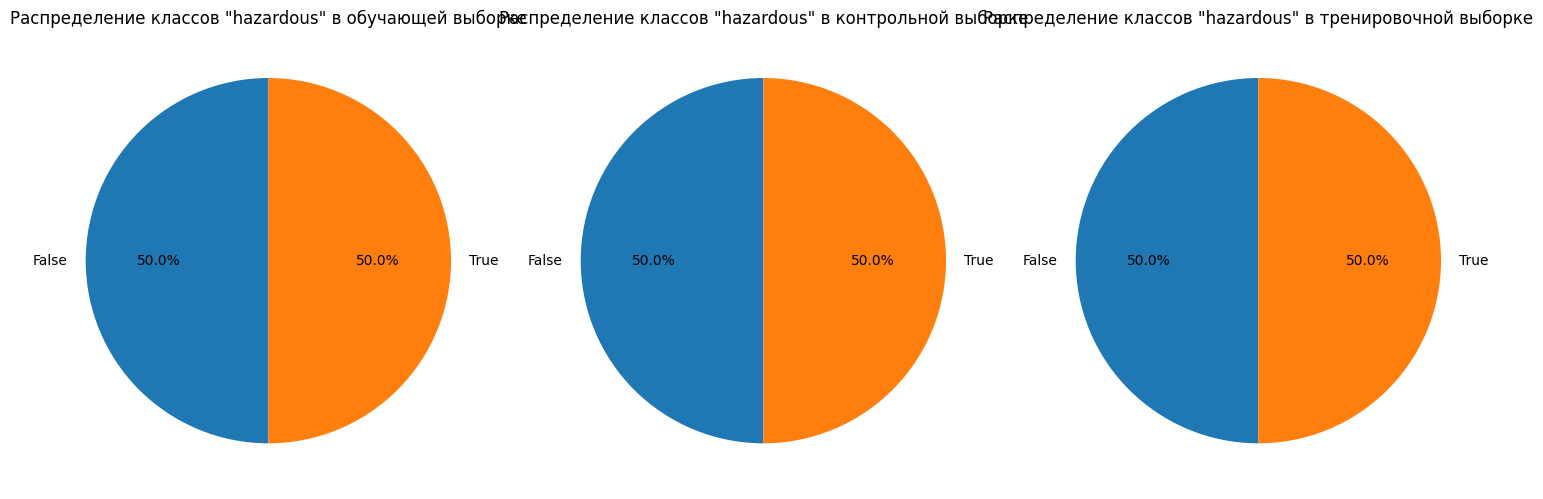

In [9]:
# Метод приращения с недостатком (undersampling)
def undersample(df: DataFrame, column: str) -> DataFrame:
    X: DataFrame = pd.get_dummies(df.drop(column, axis=1))
    y: DataFrame = df[column] # type: ignore
    
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    df_resampled: DataFrame = pd.concat([X_resampled, y_resampled], axis=1)
    return df_resampled


# Приращение данных (undersampling)
df_train_undersampled: DataFrame = undersample(df_train, 'hazardous')
df_val_undersampled: DataFrame = undersample(df_val, 'hazardous')
df_test_undersampled: DataFrame = undersample(df_test, 'hazardous')

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок после применения метода undersampling:')
check_balance(df_train_undersampled, 'Обучающая выборка', 'hazardous')
check_balance(df_val_undersampled, 'Контрольная выборка', 'hazardous')
check_balance(df_test_undersampled, 'Тестовая выборка', 'hazardous')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок после применения метода undersampling:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train_undersampled, 'hazardous', True, False) else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val_undersampled, 'hazardous', True, False) else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test_undersampled, 'hazardous', True, False) else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train_undersampled, df_val_undersampled, df_test_undersampled, 'hazardous')

## Датасет №2: [Зарплаты в области Data Science](https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary).

### Описание датасета:
Данный набор данных предназначен для исследования факторов, влияющих на заработную плату специалистов по данным (Data Scientists) в 2023 году. Набор данных содержит информацию о различных характеристиках работников, таких как уровень опыта, тип занятости, местоположение сотрудника и компании, удалённость работы и размер компании. Этот анализ помогает понять, какие факторы наиболее значимо влияют на уровень зарплат в области Data Science, и как изменяются заработные платы в зависимости от этих факторов.

---

### Анализ сведений:
**Проблемная область:**
Основная задача – изучить, как различные факторы, такие как опыт, тип занятости, местоположение и удалённость работы, влияют на уровень зарплаты специалистов по данным. Это важно для понимания рыночных тенденций и формирования конкурентоспособной системы оплаты труда.

**Актуальность:**
Данный набор данных актуален для компаний, стремящихся выстроить конкурентоспособные стратегии оплаты труда, а также для специалистов по данным, желающих оценить свои зарплатные ожидания в зависимости от их опыта, географии и типа занятости.

**Объекты наблюдения:**
Объектами наблюдения являются специалисты по данным, работающие в различных компаниях и странах, с разным уровнем опыта и типом занятости.

**Атрибуты объектов:**
- work_year: Год, в который была выплачена зарплата.
- experience_level: Уровень опыта сотрудника.
    - EN: Начальный.
    - MI: Средний.
    - SE: Старший.
    - EX: Исполнительный.
- employment_type: Тип занятости.
    - PT: Полная.
    - FT: Частичная.
    - CT: Контрактная.
    - FL: Фриланс.
- job_title: Должность, которую занимал сотрудник.
- salary: Общая сумма выплаченной заработной платы.
- salary_currency: Валюта, в которой выплачена зарплата.
- salary_in_usd: Заработная плата, конвертированная в доллары США (USD).
- employee_residence: Страна проживания сотрудника в год выплаты зарплаты.
- remote_ratio: Доля удалённой работы (например, 100% удалённо или частично удалённо).
- company_location: Страна, в которой расположена основная офисная компания работодателя.
- company_size: Среднее количество сотрудников, работающих в компании.

**Связь между объектами:**
Набор данных позволяет исследовать взаимосвязи между факторами, такими как уровень опыта, тип занятости и местоположение сотрудника, с уровнем его заработной платы. Взаимосвязи между этими факторами могут дать полезную информацию о влиянии определённых условий работы на доход.

---

### Качество набора данных:
**Информативность:**
Датасет предоставляет важную информацию для анализа различных факторов, влияющих на зарплату специалистов по данным. Он включает множество атрибутов, которые можно использовать для построения моделей и анализа.

**Степень покрытия:**
Набор данных охватывает специалистов по данным с разным опытом, работающих в различных странах, что позволяет провести сравнительный анализ и выявить региональные и глобальные тренды.

**Соответствие реальным данным:**
Заработные платы специалистов по данным, приведенные в датасете, отражают реальную ситуацию на рынке труда в 2023 году, предоставляя точные данные для анализа текущих рыночных условий.

**Согласованность меток:**
Все категории, такие как уровни опыта или типы занятости, имеют четко определённые метки, что упрощает анализ и моделирование.

---

### Бизес-цели:
1. **Оптимизация структуры оплаты труда:**
Компании могут использовать данный анализ для создания конкурентных предложений по оплате труда, основываясь на опыте, географии и других значимых факторах.
2. **Планирование найма и удержание специалистов:**
Помогает работодателям понять, какие факторы могут привлечь или удержать специалистов по данным, и оптимизировать HR-процессы для сокращения текучести кадров.
3. **Анализ глобальных и региональных зарплатных трендов:**
Позволяет компаниям проводить сравнительный анализ зарплат по регионам, уровням опыта и типам занятости, помогая в принятии решений о расширении бизнеса в разные страны.

**Эффект для бизнеса:**
Компании, использующие данную информацию, могут предлагать конкурентоспособные зарплаты, улучшить процессы найма и удержания специалистов, а также сократить издержки, связанные с высокими зарплатными ожиданиями. Это также помогает улучшить планирование бюджета на персонал.

---

### Технические цели:
1. **Построение модели прогнозирования зарплат:**
Создание модели, которая будет предсказывать уровень зарплаты специалиста по данным на основе таких факторов, как опыт, регион и удалённость работы.
2. **Анализ влияния опыта и удалённости на зарплату:**
Исследование того, как уровень опыта и удалённость работы влияют на заработную плату, что может помочь компаниям лучше планировать условия найма.
3. **Оптимизация найма специалистов:**
С помощью анализа компания может определить наиболее значимые факторы для назначения зарплат, чтобы предлагать более конкурентные условия и привлекать лучших специалистов.

**Входные данные:**
Год, уровень опыта, тип занятости, должность, зарплата, страна проживания, удалённость работы.

**Целевой признак:**
Признак "salary_in_usd" – заработная плата в долларах США.

---

### Выгрузка данных из файла в DataFrame:

In [21]:
df: DataFrame = pd.read_csv('..//static//csv//ds_salaries.csv')

### Краткая информация о DataFrame:

In [22]:
# Краткая информация о DataFrame
df.info()

# Статистическое описание числовых столбцов
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


count           mean            std     min       25%  \
work_year      3755.0    2022.373635       0.691448  2020.0    2022.0   
salary         3755.0  190695.571771  671676.500508  6000.0  100000.0   
salary_in_usd  3755.0  137570.389880   63055.625278  5132.0   95000.0   
remote_ratio   3755.0      46.271638      48.589050     0.0       0.0   

                    50%       75%         max  
work_year        2022.0    2023.0      2023.0  
salary         138000.0  180000.0  30400000.0  
salary_in_usd  135000.0  175000.0    450000.0  
remote_ratio        0.0     100.0       100.0

### Проблема пропущенных данных:

Проверка на отсутствие значений, представленная ниже, показала, что DataFrame не имеет пустых значений признаков. Нет необходимости использовать методы заполнения пропущенных данных.

In [23]:
# Проверка пропущенных данных
check_null_columns(df)

Присутствуют ли пустые значения признаков в колонке:
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool 

Количество пустых значений признаков в колонке:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64 

Процент пустых значений признаков в колонке:



### Проблема зашумленности данных:

Представленный ниже код помогает определить наличие выбросов в наборе данных и устранить их (при наличии), заменив значения ниже нижней границы (рассматриваемого минимума) на значения нижней границы, а значения выше верхней границы (рассматриваемого максимума) – на значения верхней границы.

Проверка наличия выбросов в колонках:
Колонка work_year:
	Есть выбросы: Да
	Количество выбросов: 76
	Минимальное значение: 2020
	Максимальное значение: 2023
	1-й квартиль (Q1): 2022.0
	3-й квартиль (Q3): 2023.0

Колонка salary:
	Есть выбросы: Да
	Количество выбросов: 113
	Минимальное значение: 6000
	Максимальное значение: 30400000
	1-й квартиль (Q1): 100000.0
	3-й квартиль (Q3): 180000.0

Колонка salary_in_usd:
	Есть выбросы: Да
	Количество выбросов: 63
	Минимальное значение: 5132
	Максимальное значение: 450000
	1-й квартиль (Q1): 95000.0
	3-й квартиль (Q3): 175000.0

Колонка remote_ratio:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 0
	Максимальное значение: 100
	1-й квартиль (Q1): 0.0
	3-й квартиль (Q3): 100.0



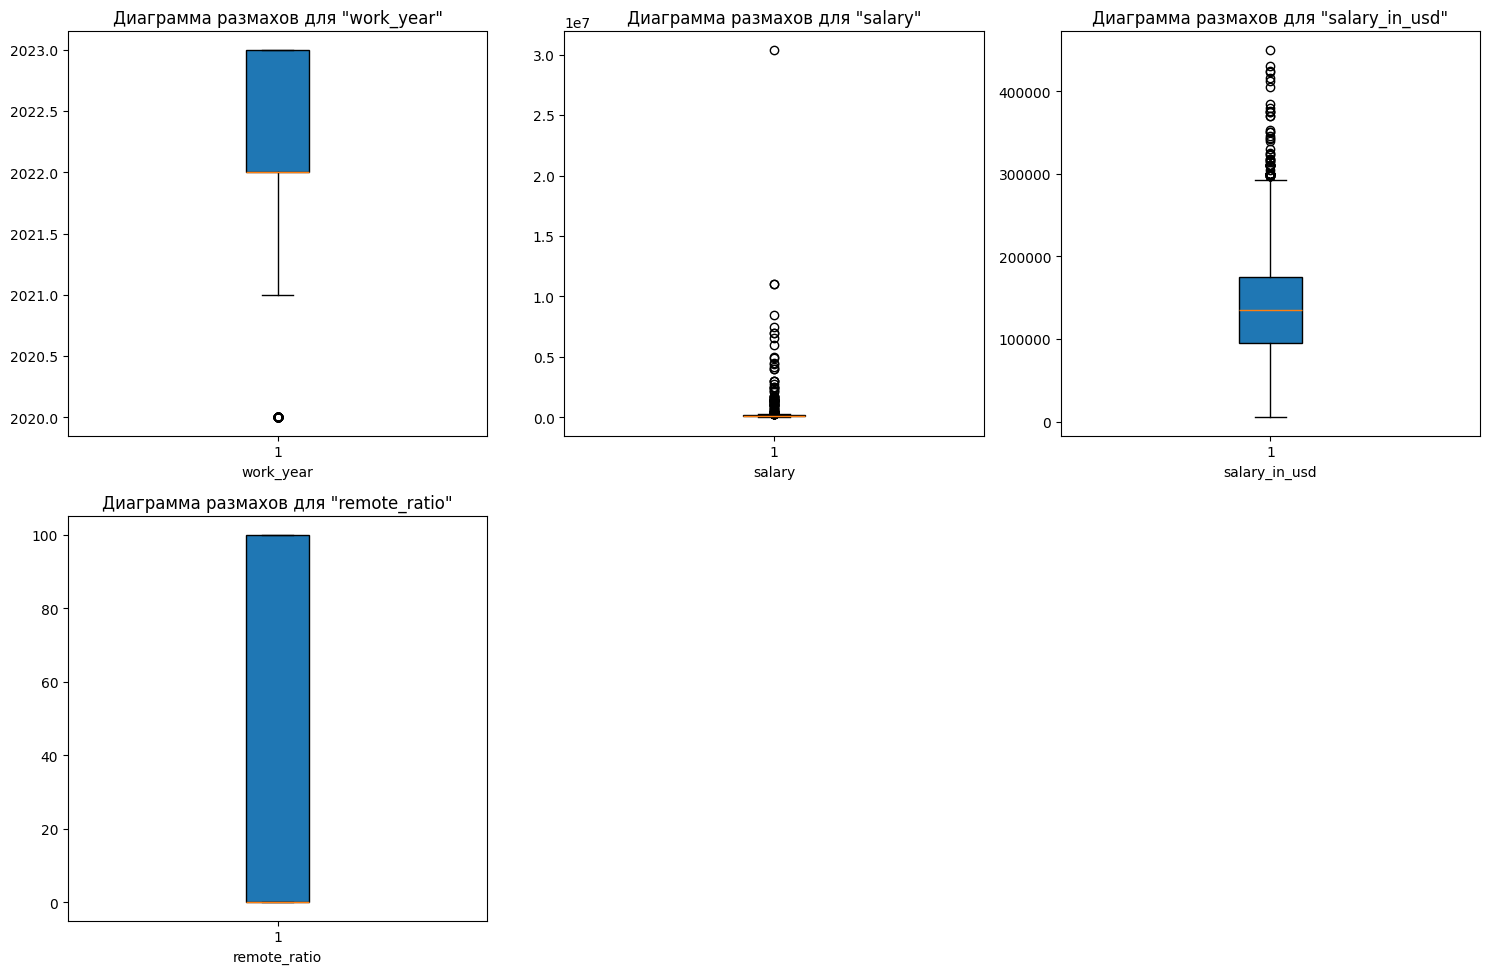

In [24]:
# Числовые столбцы DataFrame
numeric_columns: list[str] = [
    'work_year',
    'salary',
    'salary_in_usd',
    'remote_ratio'
]

# Проверка наличия выбросов в колонках
print('Проверка наличия выбросов в колонках:')
check_outliers(df, numeric_columns)
visualize_outliers(df, numeric_columns)

Проверка наличия выбросов в колонках после их устранения:
Колонка work_year:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 2020.5
	Максимальное значение: 2023.0
	1-й квартиль (Q1): 2022.0
	3-й квартиль (Q3): 2023.0

Колонка salary:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 6000.0
	Максимальное значение: 300000.0
	1-й квартиль (Q1): 100000.0
	3-й квартиль (Q3): 180000.0

Колонка salary_in_usd:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 5132.0
	Максимальное значение: 295000.0
	1-й квартиль (Q1): 95000.0
	3-й квартиль (Q3): 175000.0

Колонка remote_ratio:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 0
	Максимальное значение: 100
	1-й квартиль (Q1): 0.0
	3-й квартиль (Q3): 100.0



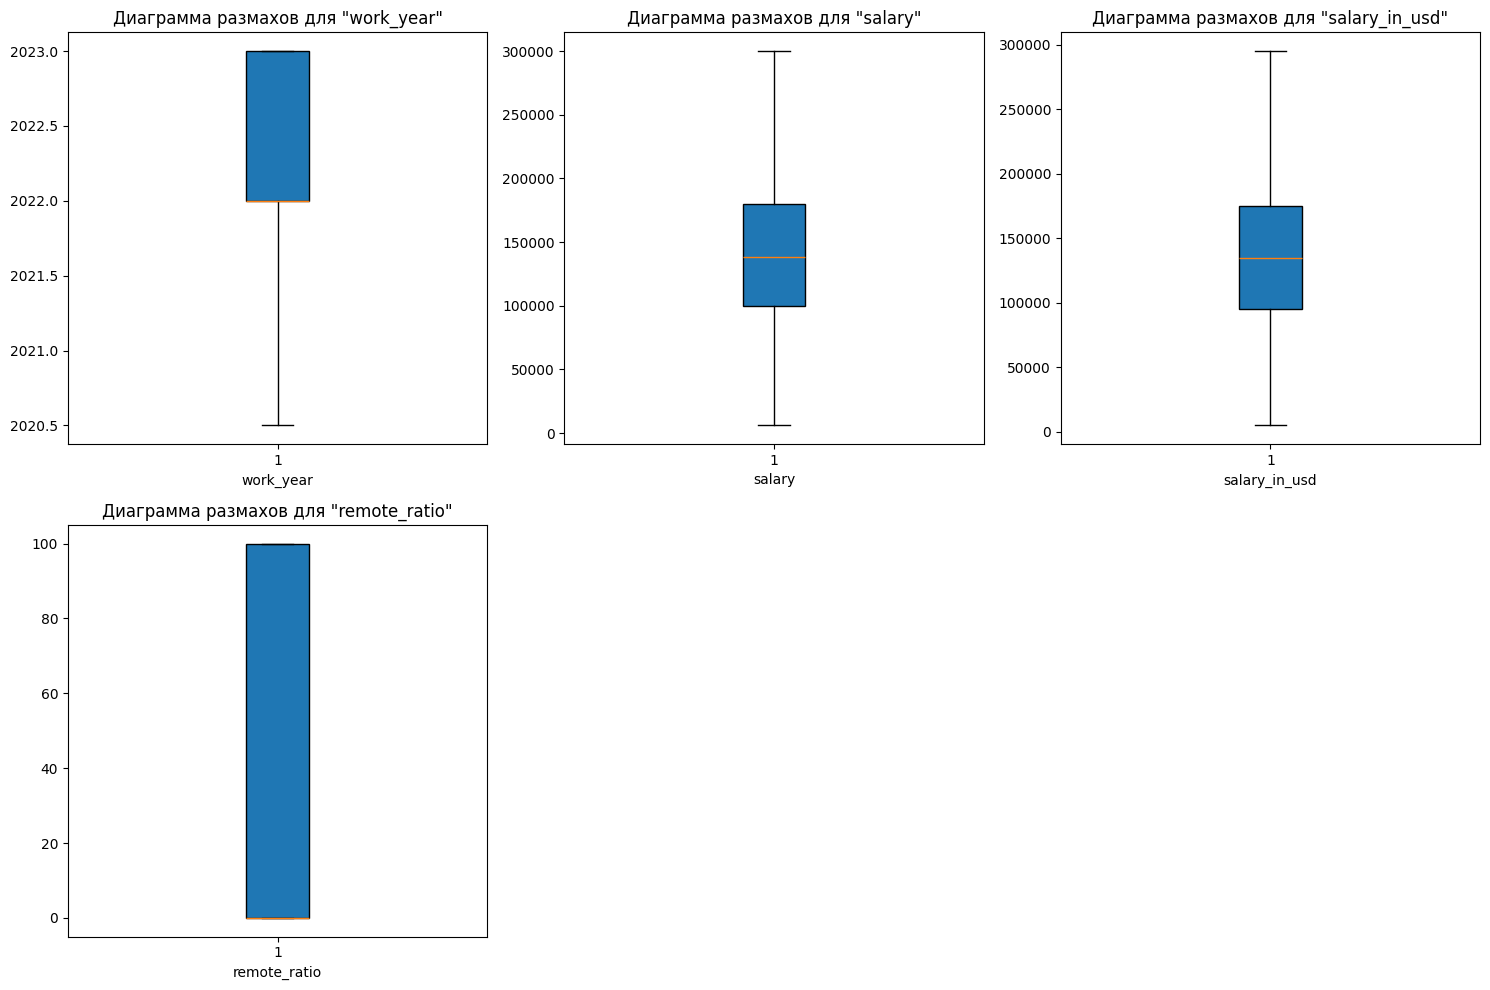

In [25]:
# Устраняем выборсы
df: DataFrame = remove_outliers(df, numeric_columns)

# Проверка наличия выбросов в колонках
print('Проверка наличия выбросов в колонках после их устранения:')
check_outliers(df, numeric_columns)
visualize_outliers(df, numeric_columns)

### Разбиение набора данных на выборки:

Разделим выборку данных на 3 группы и проанализируем качество распределения данных.

Стратифицированное разбиение требует, чтобы в каждом классе, по которому происходит стратификация, было минимум по два элемента, иначе метод не сможет корректно разделить данные на тренировочные, валидационные и тестовые наборы.

Чтобы решить эту проблему введём категории для значения зарплаты. Вместо того, чтобы использовать точные значения зарплаты для стратификации, мы создадим категории зарплат, основываясь на квартилях (25%, 50%, 75%) и минимальном и максимальном значении зарплаты. Это позволит создать более крупные классы, что устранит проблему с редкими значениями

Категории для разбиения зарплат:
- Низкая зарплата: зарплаты ниже первого квартиля (25%) — это значения меньше 95000.
- Средняя зарплата: зарплаты между первым квартилем (25%) и третьим квартилем (75%) — это зарплаты от 95000 до 175000.
- Высокая зарплата: зарплаты выше третьего квартиля (75%) и до максимального значения — это зарплаты выше 175000.

Весь набор данных состоит из 3755 объектов, из которых 1867 (около 49.7%) имеют средний уровень зарплаты (medium), 956 (около 25.4%) – низкий уровень зарплаты (low), и 932 (около 24.8%) – высокий уровень зарплаты (high).

Все выборки показывают одинаковое распределение классов, что свидетельствует о том, что данные были отобраны случайным образом и не содержат явного смещения.

Однако, несмотря на сбалансированность при разбиении данных, в целом данные обладают значительным дисбалансом между классами. Это может быть проблемой при обучении модели, так как она может иметь тенденцию игнорировать низкие или высокие зарплаты (low или high), что следует учитывать при дальнейшем анализе и выборе методов обработки данных.

Для получения более сбалансированных выборок данных необходимо воспользоваться методами приращения (аугментации) данных, а именно методами oversampling и undersampling.

Распределение количества наблюдений по меткам (классам):
salary_in_usd
100000.0    99
150000.0    98
120000.0    91
160000.0    84
130000.0    82
            ..
39916.0      1
26005.0      1
22611.0      1
5679.0       1
40038.0      1
Name: count, Length: 1002, dtype: int64 

Статистическое описание целевого признака:
count      3755.000000
mean     136959.779760
std       61098.121137
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      295000.000000
Name: salary_in_usd, dtype: float64 

Распределение количества наблюдений по меткам (классам):
salary_category
medium    1867
low        956
high       932
Name: count, dtype: int64 

Проверка сбалансированности выборок:
Обучающая выборка:  (2253, 12)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
medium    1120
low        574
high       559
Name: count, dtype: int64
Процент объектов класса "medium": 49.71%
Процент объектов класса "low": 25.48%
Процент

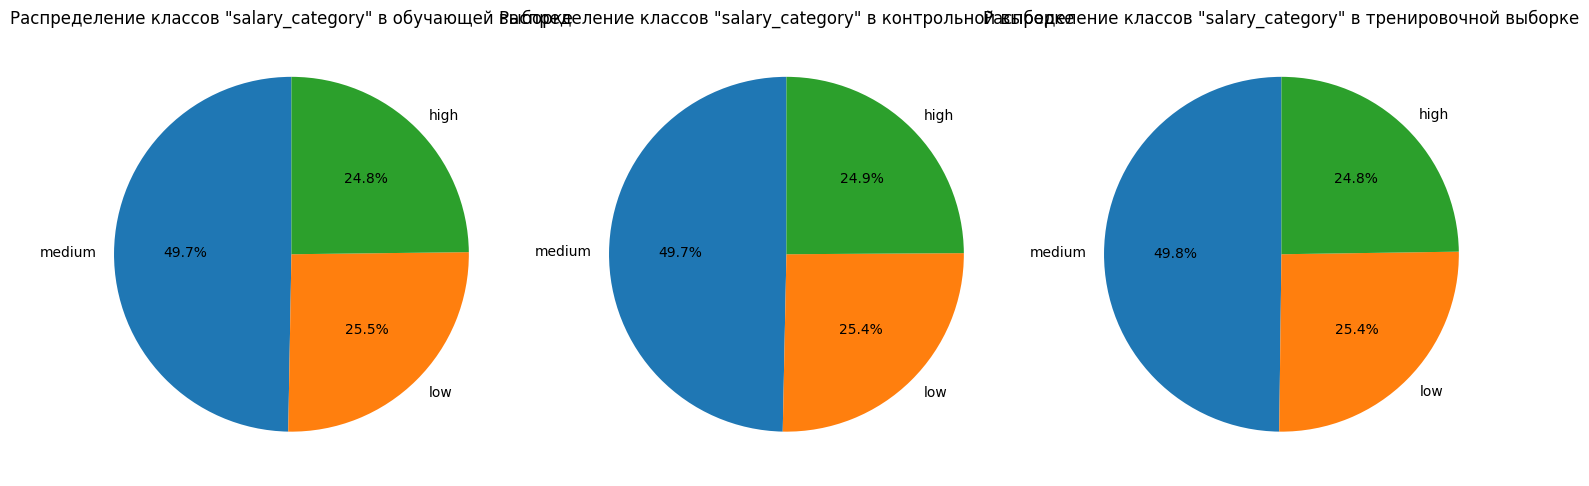

In [26]:
# Вывод распределения количества наблюдений по меткам (классам)
print('Распределение количества наблюдений по меткам (классам):')
print(df.salary_in_usd.value_counts(), '\n')

# Статистическое описание целевого признака
print('Статистическое описание целевого признака:')
print(df['salary_in_usd'].describe().transpose(), '\n')

# Определим границы для каждой категории зарплаты
bins: list[float] = [df['salary_in_usd'].min() - 1, 
                     df['salary_in_usd'].quantile(0.25), 
                     df['salary_in_usd'].quantile(0.75), 
                     df['salary_in_usd'].max() + 1]
labels: list[str] = ['low', 'medium', 'high']

# Создаем новую колонку с категориями зарплат#
df['salary_category'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels)

# Вывод распределения количества наблюдений по меткам (классам)
print('Распределение количества наблюдений по меткам (классам):')
print(df['salary_category'].value_counts(), '\n')

df_train, df_val, df_test = split_stratified_into_train_val_test(
   df,
   stratify_colname="salary_category", 
   frac_train=0.60, 
   frac_val=0.20, 
   frac_test=0.20
)

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок:')
check_balance(df_train, 'Обучающая выборка', 'salary_category')
check_balance(df_val, 'Контрольная выборка', 'salary_category')
check_balance(df_test, 'Тестовая выборка', 'salary_category')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train, 'salary_category', 'low', 'medium') else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val, 'salary_category', 'low', 'medium') else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test, 'salary_category', 'low', 'medium') else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train, df_val, df_test, 'salary_category')

### Приращение данных:

Проверка сбалансированности выборок после применения метода oversampling:
Обучающая выборка:  (3360, 240)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
low       1121
medium    1120
high      1119
Name: count, dtype: int64
Процент объектов класса "low": 33.36%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.30%

Контрольная выборка:  (1119, 154)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
low       373
medium    373
high      373
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Тестовая выборка:  (1122, 159)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
low       374
medium    374
high      374
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Проверк

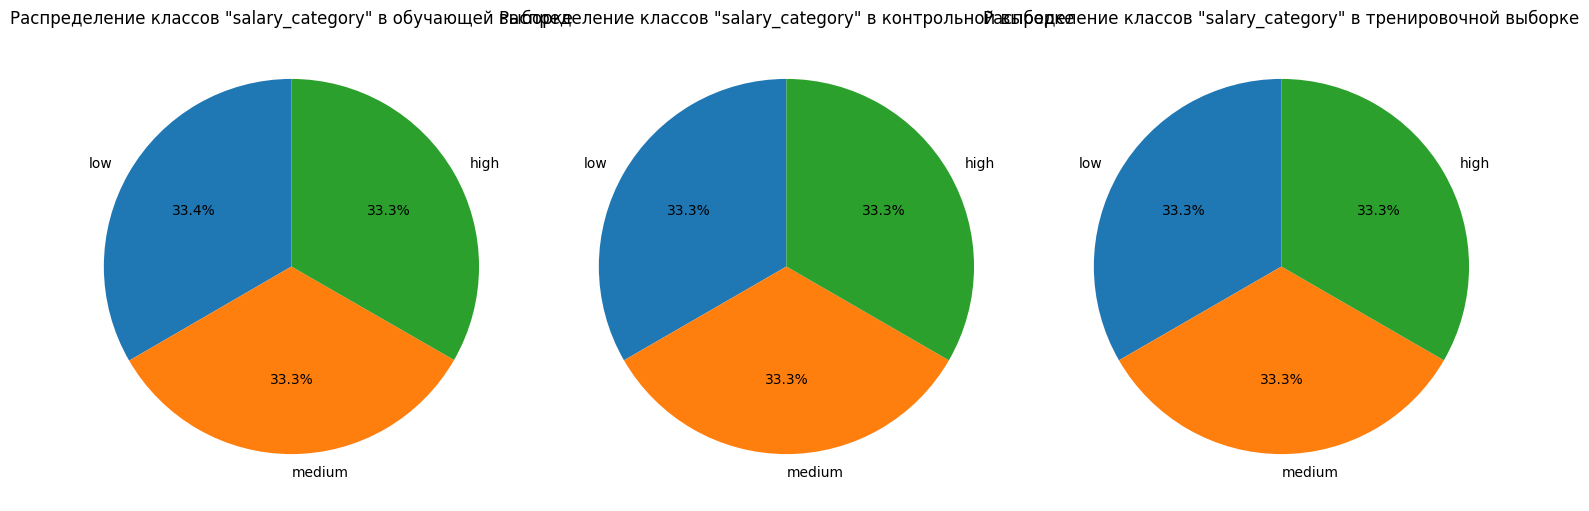

In [27]:
# Приращение данных (oversampling)
df_train_oversampled: DataFrame = oversample(df_train, 'salary_category')
df_val_oversampled: DataFrame = oversample(df_val, 'salary_category')
df_test_oversampled: DataFrame = oversample(df_test, 'salary_category')

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок после применения метода oversampling:')
check_balance(df_train_oversampled, 'Обучающая выборка', 'salary_category')
check_balance(df_val_oversampled, 'Контрольная выборка', 'salary_category')
check_balance(df_test_oversampled, 'Тестовая выборка', 'salary_category')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок после применения метода oversampling:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train_oversampled, 'salary_category', 'low', 'medium') else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val_oversampled, 'salary_category', 'low', 'medium') else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test_oversampled, 'salary_category', 'low', 'medium') else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train_oversampled, df_val_oversampled, df_test_oversampled, 'salary_category')

Проверка сбалансированности выборок после применения метода undersampling:
Обучающая выборка:  (1677, 240)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
low       559
medium    559
high      559
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Контрольная выборка:  (561, 154)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
low       187
medium    187
high      187
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Тестовая выборка:  (558, 159)
Распределение выборки данных по классам в колонке "salary_category":
 salary_category
low       186
medium    186
high      186
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Проверка не

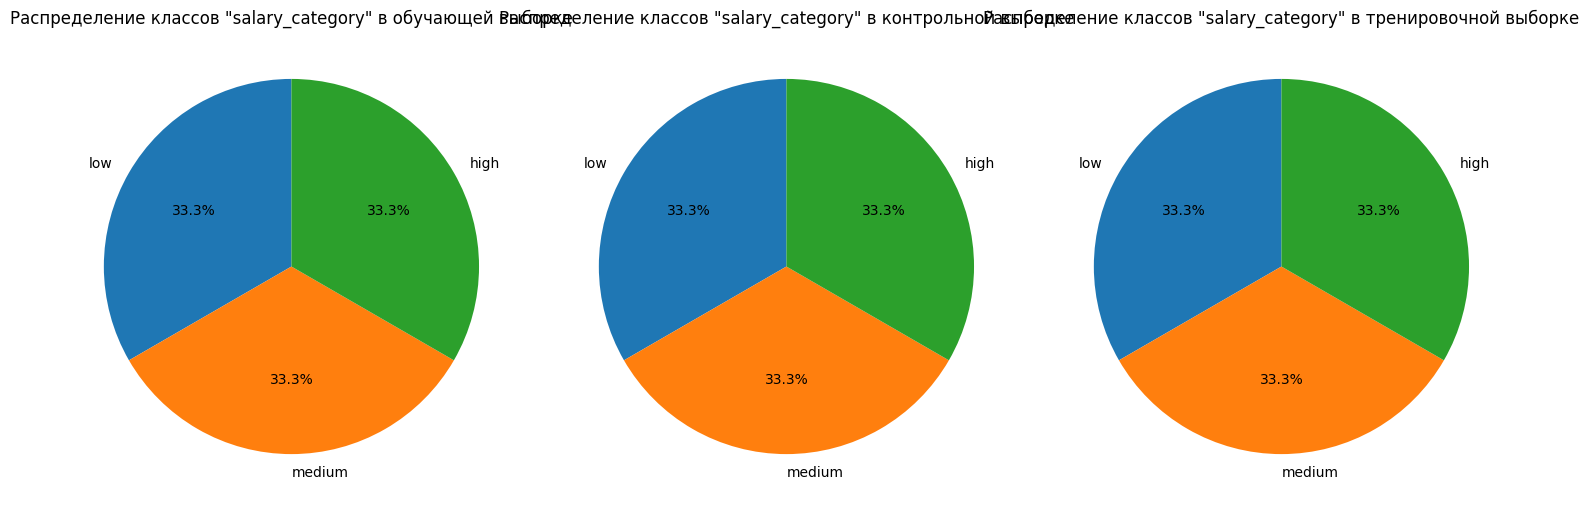

In [28]:
# Приращение данных (undersampling)
df_train_undersampled: DataFrame = undersample(df_train, 'salary_category')
df_val_undersampled: DataFrame = undersample(df_val, 'salary_category')
df_test_undersampled: DataFrame = undersample(df_test, 'salary_category')

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок после применения метода undersampling:')
check_balance(df_train_undersampled, 'Обучающая выборка', 'salary_category')
check_balance(df_val_undersampled, 'Контрольная выборка', 'salary_category')
check_balance(df_test_undersampled, 'Тестовая выборка', 'salary_category')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок после применения метода undersampling:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train_undersampled, 'salary_category', 'low', 'medium') else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val_undersampled, 'salary_category', 'low', 'medium') else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test_undersampled, 'salary_category', 'low', 'medium') else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train_undersampled, df_val_undersampled, df_test_undersampled, 'salary_category')

## Датасет №3: [Экономика стран](https://www.kaggle.com/datasets/pratik453609/economic-data-9-countries-19802020).

### Описание датасета:
Данный набор данных содержит информацию о ключевых макроэкономических показателях для восьми стран (Китай, Франция, Германия, Индия, Япония, Испания, Великобритания, США) и одного специального административного района (Гонконг) за период с 1980 по 2020 год. В наборе представлены данные о таких макроэкономических переменных, как инфляция, уровень безработицы, ВВП, обменные курсы (по отношению к доллару США), доход на душу населения и цены на основные фондовые индексы каждой страны. Этот датасет полезен для анализа взаимосвязей между экономическими показателями и динамикой фондовых индексов стран, что может быть использовано для экономического моделирования и прогноза.

---

### Анализ сведений:
**Проблемная область:**
Основная задача – исследование взаимосвязей между макроэкономическими переменными и ценами на фондовые индексы, а также анализ влияния таких факторов, как инфляция, ВВП и обменные курсы на фондовые рынки и экономическую стабильность стран.

**Актуальность:**
Этот датасет актуален для исследователей, аналитиков и экономистов, занимающихся изучением макроэкономических трендов, финансовых рынков и их взаимосвязей. Он предоставляет данные, необходимые для анализа экономических кризисов, изменений на фондовых рынках и долгосрочных макроэкономических прогнозов.

**Объекты наблюдения:**
Страны (или регионы), данные по которым включены в датасет: Китай, Франция, Германия, Гонконг, Индия, Япония, Испания, Великобритания и США. Для каждого из них собирались данные за период с 1980 по 2020 год.

**Атрибуты объектов:**
- stock index: Название основного фондового индекса страны.
- country: Название страны.
- year: Год, к которому относятся данные.
- index price: Средняя цена фондового индекса за год.
- log_indexprice: Логарифмическое значение цены индекса для учета валютных различий.
- inflationrate: Уровень инфляции в стране.
- oil prices: Цены на нефть в долларах США.
- exchange_rate: Обменный курс валюты страны по отношению к доллару США.
- gdppercent: Рост ВВП (в процентах).
- percapitaincome: Доход на душу населения.
- unemploymentrate: Уровень безработицы (в процентах).
- manufacturingoutput: Объем производства в промышленном секторе страны.
- tradebalance: Торговый баланс.
- USTreasury: Облигации.

**Связь между объектами:**
Данные позволяют исследовать взаимосвязи между макроэкономическими факторами и ценами на фондовые индексы, а также между другими экономическими показателями. Например, можно анализировать, как инфляция и обменный курс влияют на фондовый рынок каждой страны или как колебания цен на нефть отражаются на экономике разных стран.

---

### Качество набора данных:
**Информативность:**
Датасет включает широкий спектр макроэкономических показателей и цены фондовых индексов за 40-летний период, что делает его очень полезным для анализа долгосрочных экономических трендов и финансовых рынков.

**Степень покрытия:**
Набор данных охватывает данные по ведущим экономикам мира, представляя достаточно полную картину макроэкономической динамики в разных странах и регионах за большой временной период (1980–2020 гг.).

**Соответствие реальным данным:**
Все представленные макроэкономические показатели и цены фондовых индексов являются официальными экономическими данными, которые используются для анализа и прогнозирования в реальных условиях.

**Согласованность меток:**
Названия признаков определены недостаточно чётко. Обычно названия признаков записываются в стиле "snake_case" – слова пишутся строчными буквами и разделяются знаком нижнего подчеркивания. В данном же случае некоторые названия переменных записаны в стиле "snake_case", у некоторых слова разделяются пробелом, у некоторых вовсе не разделяются и пишутся слитно. Также в описании датасета отсутствовала расшифровка нескольких столбцов датасета – их предназначение пришлось домысливать самому, основываясь лишь на собственной логике. Сами данные представляют собой легко интерпретируемые экономические показатели, что упрощает их анализ и использование в эконометрических моделях.

---

### Бизес-цели:
1. **Оценка влияния макроэкономических факторов на фондовые рынки:**
Анализ взаимосвязей между инфляцией, обменными курсами, ВВП и динамикой фондовых индексов для прогнозирования изменений на фондовых рынках.
2. **Прогнозирование экономических кризисов:**
Использование данных для создания моделей, позволяющих прогнозировать экономические кризисы или спады на основе динамики ключевых макроэкономических переменных.
3. **Оптимизация инвестиционных решений:**
Помощь инвесторам и финансовым аналитикам в понимании влияния экономических факторов на фондовые рынки для принятия более обоснованных инвестиционных решений.

**Эффект для бизнеса:**
Компании, использующие данные для анализа и прогнозирования, могут лучше управлять рисками, связанными с изменениями на фондовых рынках и макроэкономическими условиями. Это может привести к более точным инвестиционным стратегиям и повышению эффективности управления активами.

---

### Технические цели:
1. **Построение модели прогнозирования цен на фондовые индексы:**
Создание модели машинного обучения для прогнозирования цен на фондовые индексы на основе макроэкономических показателей, таких как инфляция, ВВП и обменные курсы.
2. **Анализ корреляций между макроэкономическими переменными:**
Проведение анализа корреляций между такими показателями, как инфляция, доход на душу населения, цены на нефть и курс валют для выявления ключевых факторов, влияющих на фондовые рынки.
3. **Прогнозирование долгосрочных экономических трендов:**
Использование данных для построения прогнозов долгосрочных макроэкономических трендов и их влияния на экономику и финансовые рынки.

**Входные данные:**
Инфляция, ВВП, обменные курсы, цены на нефть, цены фондовых индексов, доход на душу населения, уровень безработицы, объем производства в промышленном секторе страны, торговый баланс, облигации.

**Целевой признак:**
Признак "index_price" – средняя цена фондового индекса страны.

---

### Выгрузка данных из файла в DataFrame:

In [29]:
df: DataFrame = pd.read_csv('..//static//csv//economic_data.csv')

### Краткая информация о DataFrame:

In [30]:
# Краткая информация о DataFrame
df.info()

# Статистическое описание числовых столбцов
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


count          mean           std      min      25%  \
year                 369.0   2000.000000     11.848225  1980.00  1990.00   
index price          317.0   7898.648297   7811.336862   168.61  2407.10   
log_indexprice       369.0      3.610542      0.482481     2.23     3.32   
inflationrate        326.0      0.041748      0.039579    -0.04     0.02   
oil prices           369.0     39.743171     25.452654    11.35    19.41   
exchange_rate        367.0     27.897548     49.620521     0.90     1.33   
gdppercent           350.0      0.037114      0.037850    -0.11     0.02   
percapitaincome      368.0  20719.964674  17435.037783    27.00  2090.25   
unemploymentrate     348.0      0.068908      0.043207     0.02     0.04   
manufacturingoutput  278.0    328.084820    622.395923     0.59    80.38   
tradebalance         365.0    -15.996384    154.557170  -770.93   -25.37   
USTreasury           369.0      0.059024      0.033086     0.01     0.03   

                          50%         75%       max  
year                  2000.00   2010.0000   2020.00  
index price           5160.10  10279.5000  47751.33  
log_indexprice           3.60      3.9800      4.68  
inflationrate            0.03      0.0575      0.24  
oil prices              28.52     57.8800     98.56  
exchange_rate            5.44     15.0550    249.05  
gdppercent               0.03      0.0600      0.15  
percapitaincome      19969.50  36384.0000  65280.00  
unemploymentrate         0.06      0.0900      0.26  
manufacturingoutput    188.16    271.9775   3868.46  
tradebalance            -0.14     19.0800    366.14  
USTreasury               0.05      0.0800      0.14

### Проблема пропущенных данных:

Проверка на отсутствие значений, представленная ниже, показала, что некоторые колонки DataFrame содержат пустые значения признаков.

Решения проблемы отсутствия значений:
1. Удаление примеров с пустыми значениями (допустимо для набора данных с большим количеством наблюдений).
2. Использовать метод машинного обучения, который способен обработать пустые значения (например, деревья решений).
3. Использовать методы подстановки данных:
    - Заполнить средним значением признака (среднее по колонке).
    - Подставить магическое число (число за диапазоном доступных значений).
    - Обучить модель для предсказания пропущенного значения на основе других значений наблюдения.

Воспользуемся методом подстановки среднего значения признака.

In [31]:
# Заполнить пропущенные данные средним значением
def fill_null_columns(dataframe: DataFrame) -> DataFrame:
    for column in dataframe.columns:
        null_rate: float = dataframe[column].isnull().sum() / len(dataframe) * 100
        if null_rate > 0:
            # Замена пустых данных на медиану
            df[column] = df[column].fillna(df[column].median())
    
    return dataframe


# Проверка пропущенных данных
print('До заполнения пустых значений:')
check_null_columns(df)

# Заполнение пропущенных значений
df: DataFrame = fill_null_columns(df)

# Проверка пропущенных данных
print('После заполнения пустых значений:')
check_null_columns(df)

До заполнения пустых значений:
Присутствуют ли пустые значения признаков в колонке:
stock index            False
country                False
year                   False
index price             True
log_indexprice         False
inflationrate           True
oil prices             False
exchange_rate           True
gdppercent              True
percapitaincome         True
unemploymentrate        True
manufacturingoutput     True
tradebalance            True
USTreasury             False
dtype: bool 

Количество пустых значений признаков в колонке:
stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64 

Процент пустых значений признаков в колонке:
index price процент пуст

### Проблема зашумленности данных:

Представленный ниже код помогает определить наличие выбросов в наборе данных и устранить их (при наличии), заменив значения ниже нижней границы (рассматриваемого минимума) на значения нижней границы, а значения выше верхней границы (рассматриваемого максимума) – на значения верхней границы.

Проверка наличия выбросов в колонках:
Колонка year:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 1980.0
	Максимальное значение: 2020.0
	1-й квартиль (Q1): 1990.0
	3-й квартиль (Q3): 2010.0

Колонка index price:
	Есть выбросы: Да
	Количество выбросов: 33
	Минимальное значение: 168.61
	Максимальное значение: 47751.33
	1-й квартиль (Q1): 2846.5
	3-й квартиль (Q3): 9484.47

Колонка log_indexprice:
	Есть выбросы: Да
	Количество выбросов: 3
	Минимальное значение: 2.23
	Максимальное значение: 4.68
	1-й квартиль (Q1): 3.32
	3-й квартиль (Q3): 3.98

Колонка inflationrate:
	Есть выбросы: Да
	Количество выбросов: 38
	Минимальное значение: -0.04
	Максимальное значение: 0.24
	1-й квартиль (Q1): 0.02
	3-й квартиль (Q3): 0.05

Колонка oil prices:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 11.35
	Максимальное значение: 98.56
	1-й квартиль (Q1): 19.41
	3-й квартиль (Q3): 57.88

Колонка exchange_rate:
	Есть выбросы: Да
	Количество выбросов: 85
	Минимальное зна

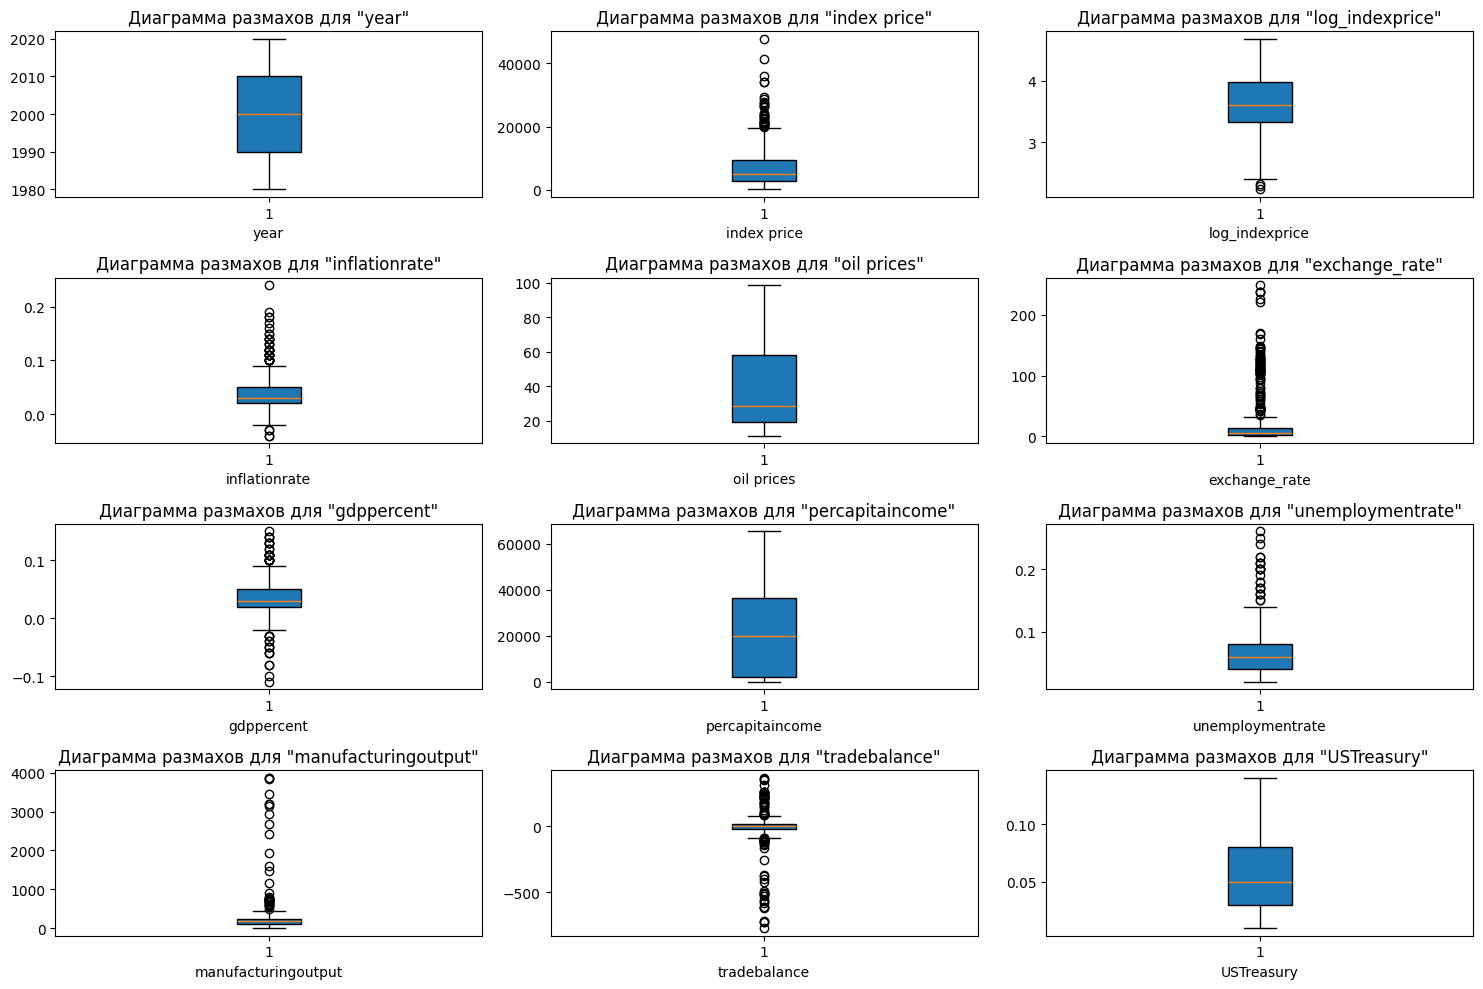

In [32]:
# Числовые столбцы DataFrame
numeric_columns: list[str] = [
    'year',
    'index price',
    'log_indexprice',
    'inflationrate',
    'oil prices',
    'exchange_rate',
    'gdppercent',
    'percapitaincome',
    'unemploymentrate',
    'manufacturingoutput',
    'tradebalance',
    'USTreasury'
]

# Проверка наличия выбросов в колонках
print('Проверка наличия выбросов в колонках:')
check_outliers(df, numeric_columns)
visualize_outliers(df, numeric_columns)

Проверка наличия выбросов в колонках после их устранения:
Колонка year:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 1980.0
	Максимальное значение: 2020.0
	1-й квартиль (Q1): 1990.0
	3-й квартиль (Q3): 2010.0

Колонка index price:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 168.61
	Максимальное значение: 19441.424999999996
	1-й квартиль (Q1): 2846.5
	3-й квартиль (Q3): 9484.47

Колонка log_indexprice:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 2.3299999999999996
	Максимальное значение: 4.68
	1-й квартиль (Q1): 3.32
	3-й квартиль (Q3): 3.98

Колонка inflationrate:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: -0.025000000000000005
	Максимальное значение: 0.095
	1-й квартиль (Q1): 0.02
	3-й квартиль (Q3): 0.05

Колонка oil prices:
	Есть выбросы: Нет
	Количество выбросов: 0
	Минимальное значение: 11.35
	Максимальное значение: 98.56
	1-й квартиль (Q1): 19.41
	3-й квартиль (Q3): 57.88

Колонка exchange_rat

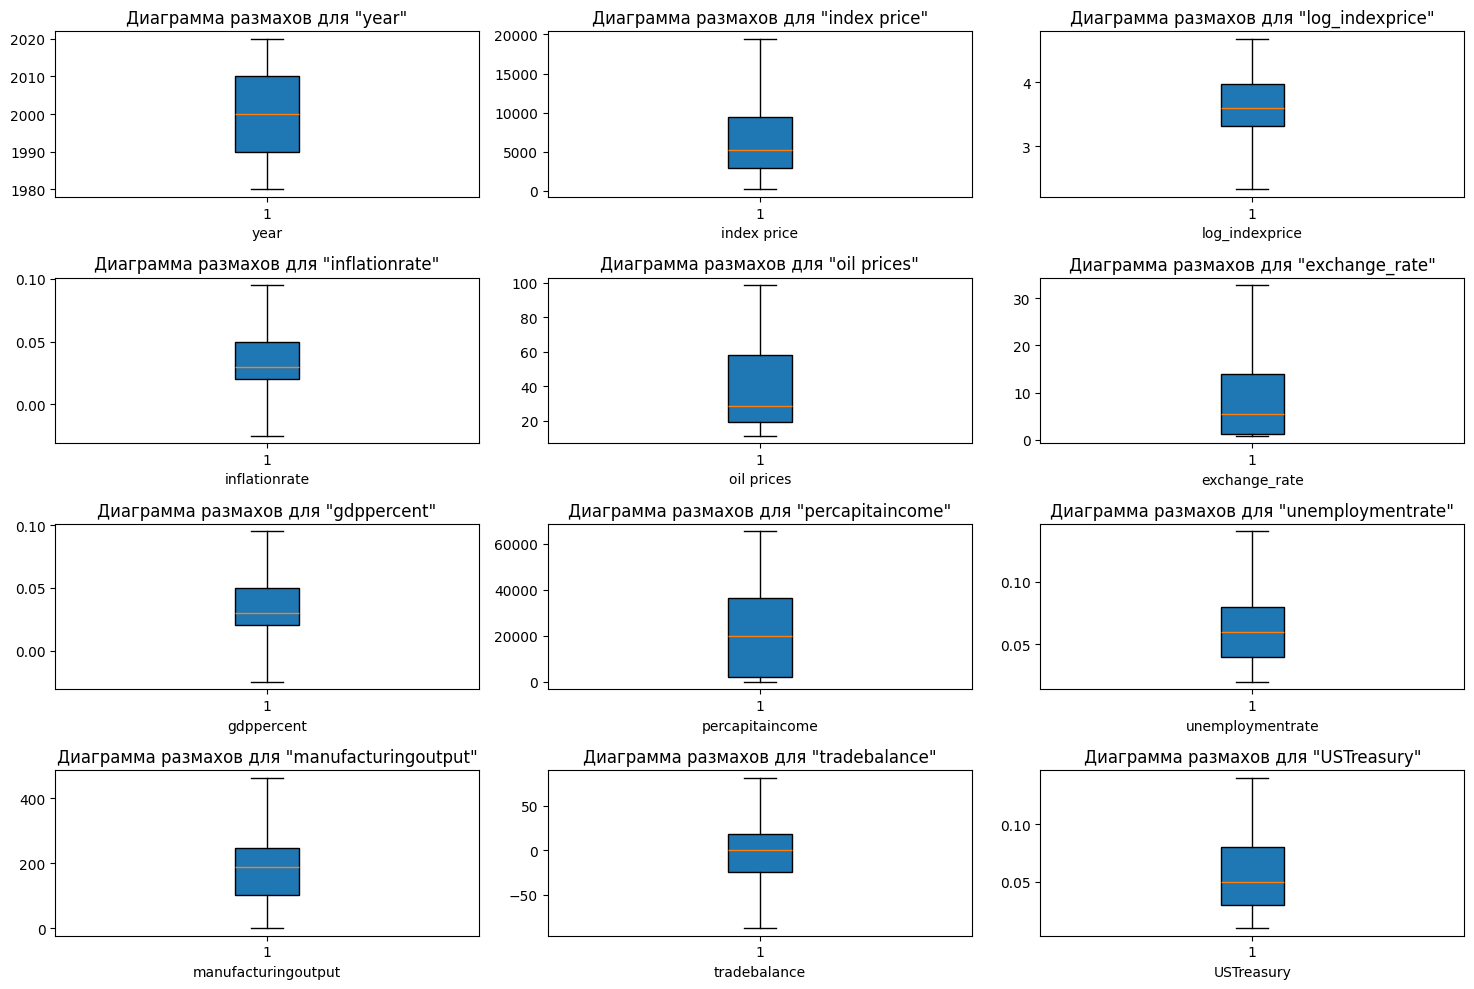

In [33]:
# Устраняем выборсы
df: DataFrame = remove_outliers(df, numeric_columns)

# Проверка наличия выбросов в колонках
print('Проверка наличия выбросов в колонках после их устранения:')
check_outliers(df, numeric_columns)
visualize_outliers(df, numeric_columns)

### Разбиение набора данных на выборки:

Разделим выборку данных на 3 группы и проанализируем качество распределения данных.

Стратифицированное разбиение требует, чтобы в каждом классе, по которому происходит стратификация, было минимум по два элемента, иначе метод не сможет корректно разделить данные на тренировочные, валидационные и тестовые наборы.

Чтобы решить эту проблему введём категории для значения цены фондового рынка. Вместо того, чтобы использовать точные значения цен для стратификации, мы создадим категории, основываясь на квартилях (25%, 50%, 75%) и минимальном и максимальном значении. Это позволит создать более крупные классы, что устранит проблему с редкими значениями.

Категории для разбиения зарплат:
- Низкая цена индекса: значения ниже первого квартиля (25%) — это цены фондовых индексов ниже 2846.50.
- Средняя цена индекса: значения между первым квартилем (25%) и третьим квартилем (75%) — это цены от 2846.50 до 9484.47.
- Высокая цена индекса: значения выше третьего квартиля (75%) и до максимального значения — это цены выше 9484.47.

Весь набор данных состоит из 369 объектов, из которых 184 (около 49.9%) имеют средний уровень цены фондового рынка (medium), 93 (около 25.2%) – низкий уровень цены (low), и 92 (около 24.9%) – высокий уровень цены (high).

Все выборки показывают одинаковое распределение классов, что свидетельствует о том, что данные были отобраны случайным образом и не содержат явного смещения.

Однако, несмотря на сбалансированность при разбиении данных, в целом данные обладают значительным дисбалансом между классами. Это может быть проблемой при обучении модели, так как она может иметь тенденцию игнорировать низкие или высокие цены фондовых рынков (low или high), что следует учитывать при дальнейшем анализе и выборе методов обработки данных.

Для получения более сбалансированных выборок данных необходимо воспользоваться методами приращения (аугментации) данных, а именно методами oversampling и undersampling.

Распределение количества наблюдений по меткам (классам):
index price
5160.100     53
19441.425    33
1000.000      2
285.430       1
248.890       1
             ..
1647.170      1
1986.530      1
2099.320      1
2263.410      1
203.150       1
Name: count, Length: 284, dtype: int64 

Статистическое описание целевого признака:
count      369.000000
mean      6948.930095
std       5682.147273
min        168.610000
25%       2846.500000
50%       5160.100000
75%       9484.470000
max      19441.425000
Name: index price, dtype: float64 

Распределение количества наблюдений по меткам (классам):
index_price_category
medium    184
low        93
high       92
Name: count, dtype: int64 

Проверка сбалансированности выборок:
Обучающая выборка:  (221, 15)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
medium    110
low        56
high       55
Name: count, dtype: int64
Процент объектов класса "medium": 49.77%
Процент объектов класса "low": 25.34%
П

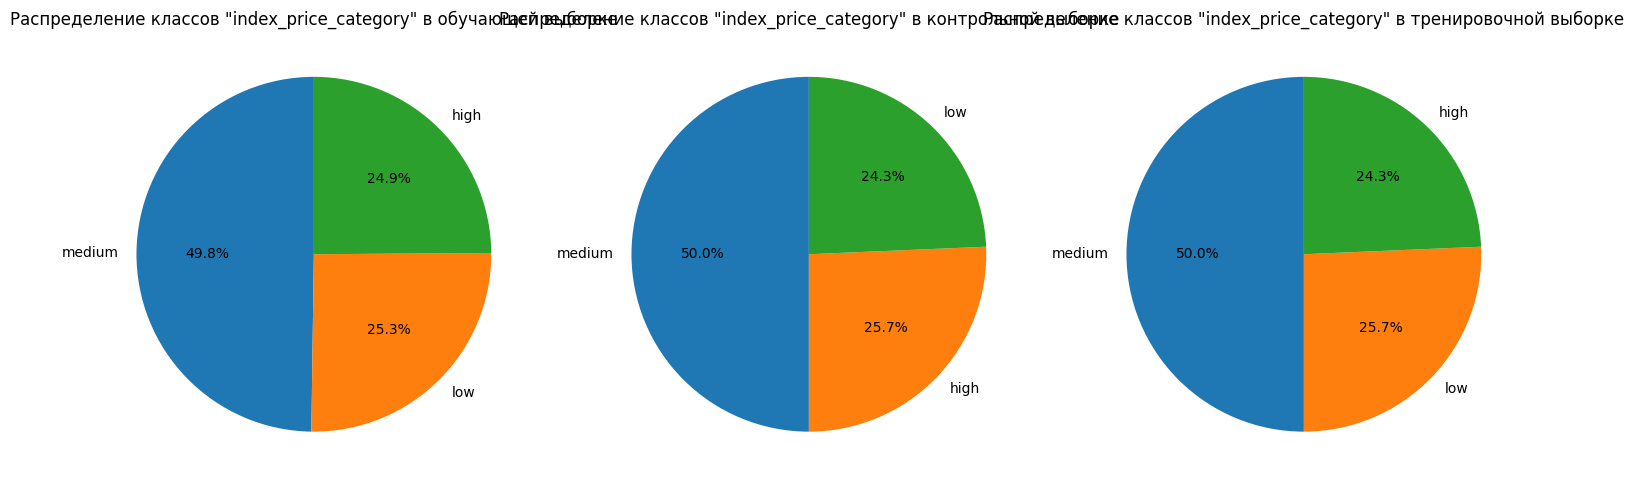

In [34]:
# Вывод распределения количества наблюдений по меткам (классам)
print('Распределение количества наблюдений по меткам (классам):')
print(df['index price'].value_counts(), '\n')

# Статистическое описание целевого признака
print('Статистическое описание целевого признака:')
print(df['index price'].describe().transpose(), '\n')

# Определим границы для каждой категории цен фондового рынка
bins: list[float] = [df['index price'].min() - 1, 
                     df['index price'].quantile(0.25), 
                     df['index price'].quantile(0.75), 
                     df['index price'].max() + 1]
labels: list[str] = ['low', 'medium', 'high']

# Создаем новую колонку с категориями зарплат
df['index_price_category'] = pd.cut(df['index price'], bins=bins, labels=labels)

# Вывод распределения количества наблюдений по меткам (классам)
print('Распределение количества наблюдений по меткам (классам):')
print(df['index_price_category'].value_counts(), '\n')

df_train, df_val, df_test = split_stratified_into_train_val_test(
   df,
   stratify_colname="index_price_category", 
   frac_train=0.60, 
   frac_val=0.20, 
   frac_test=0.20
)

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок:')
check_balance(df_train, 'Обучающая выборка', 'index_price_category')
check_balance(df_val, 'Контрольная выборка', 'index_price_category')
check_balance(df_test, 'Тестовая выборка', 'index_price_category')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train, 'index_price_category', 'low', 'medium') else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val, 'index_price_category', 'low', 'medium') else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test, 'index_price_category', 'low', 'medium') else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train, df_val, df_test, 'index_price_category')

### Приращение данных:

Проверка сбалансированности выборок после применения метода oversampling:
Обучающая выборка:  (335, 31)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
low       115
medium    110
high      110
Name: count, dtype: int64
Процент объектов класса "low": 34.33%
Процент объектов класса "medium": 32.84%
Процент объектов класса "high": 32.84%

Контрольная выборка:  (110, 31)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
high      40
medium    37
low       33
Name: count, dtype: int64
Процент объектов класса "high": 36.36%
Процент объектов класса "medium": 33.64%
Процент объектов класса "low": 30.00%

Тестовая выборка:  (115, 31)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
low       42
medium    37
high      36
Name: count, dtype: int64
Процент объектов класса "low": 36.52%
Процент объектов класса "medium": 32.17%
Процент объектов класса "high": 

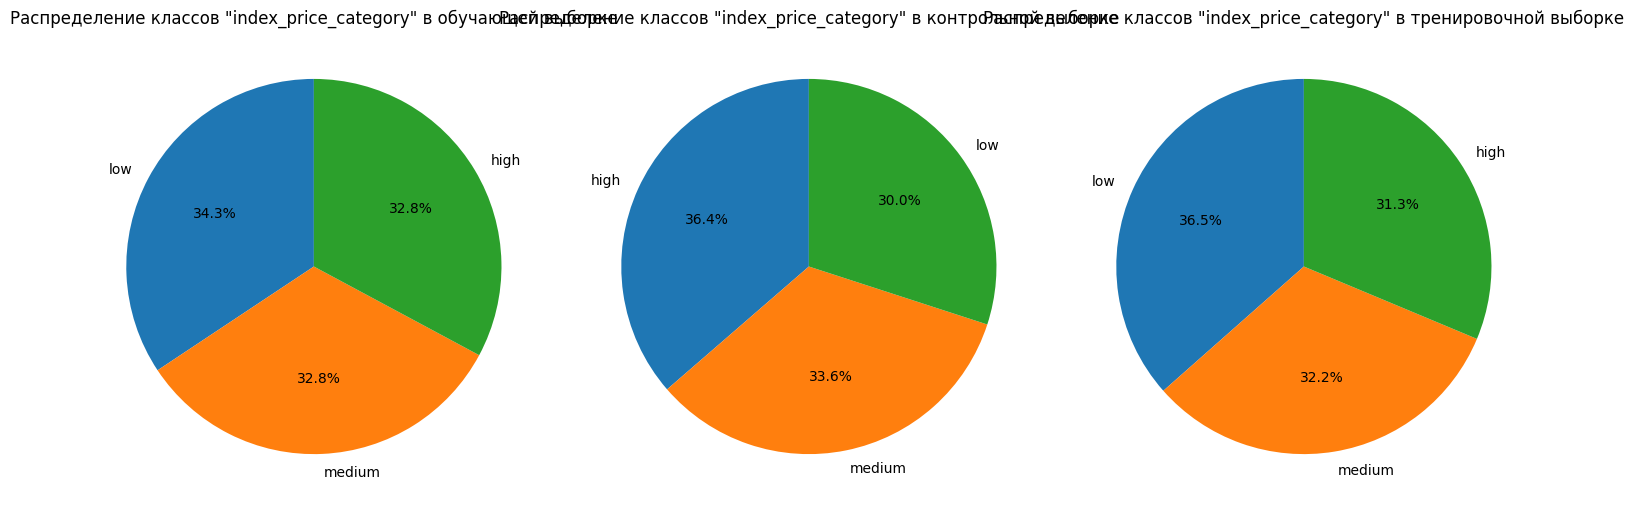

In [35]:
# Приращение данных (oversampling)
df_train_oversampled: DataFrame = oversample(df_train, 'index_price_category')
df_val_oversampled: DataFrame = oversample(df_val, 'index_price_category')
df_test_oversampled: DataFrame = oversample(df_test, 'index_price_category')

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок после применения метода oversampling:')
check_balance(df_train_oversampled, 'Обучающая выборка', 'index_price_category')
check_balance(df_val_oversampled, 'Контрольная выборка', 'index_price_category')
check_balance(df_test_oversampled, 'Тестовая выборка', 'index_price_category')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок после применения метода oversampling:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train_oversampled, 'index_price_category', 'low', 'medium') else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val_oversampled, 'index_price_category', 'low', 'medium') else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test_oversampled, 'index_price_category', 'low', 'medium') else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train_oversampled, df_val_oversampled, df_test_oversampled, 'index_price_category')

Проверка сбалансированности выборок после применения метода undersampling:
Обучающая выборка:  (165, 31)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
low       55
medium    55
high      55
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Контрольная выборка:  (54, 31)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
low       18
medium    18
high      18
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.33%

Тестовая выборка:  (54, 31)
Распределение выборки данных по классам в колонке "index_price_category":
 index_price_category
low       18
medium    18
high      18
Name: count, dtype: int64
Процент объектов класса "low": 33.33%
Процент объектов класса "medium": 33.33%
Процент объектов класса "high": 33.3

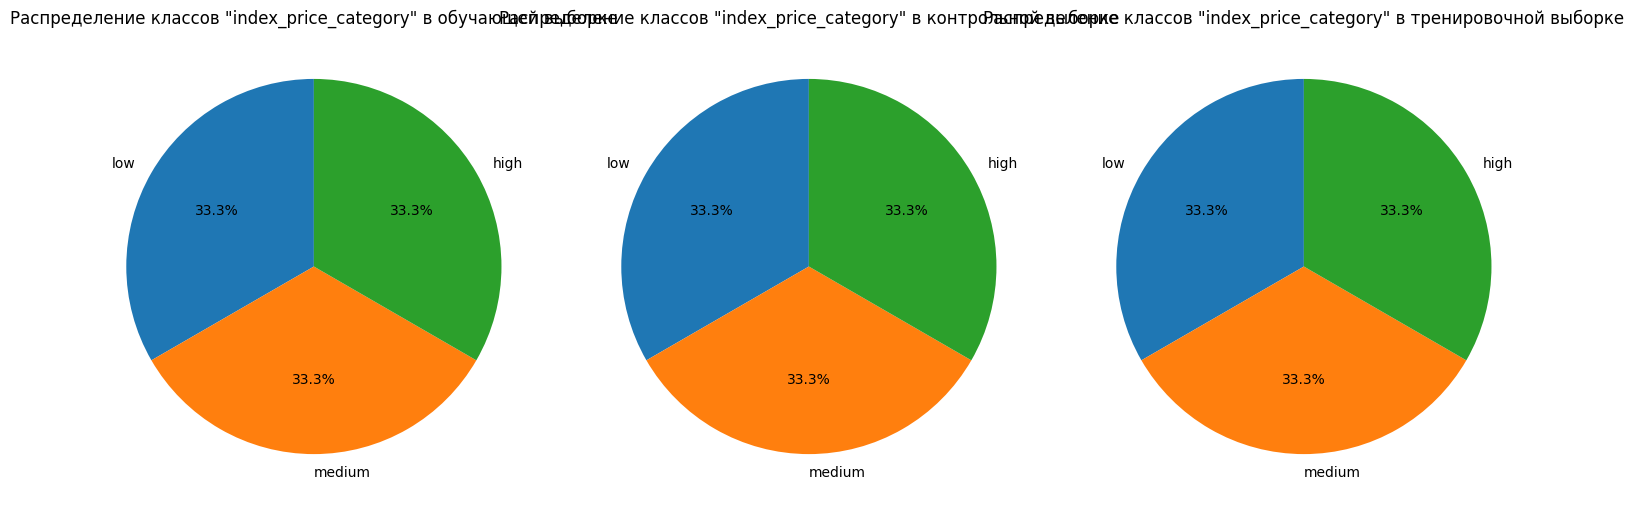

In [36]:
# Приращение данных (undersampling)
df_train_undersampled: DataFrame = undersample(df_train, 'index_price_category')
df_val_undersampled: DataFrame = undersample(df_val, 'index_price_category')
df_test_undersampled: DataFrame = undersample(df_test, 'index_price_category')

# Проверка сбалансированности выборок
print('Проверка сбалансированности выборок после применения метода undersampling:')
check_balance(df_train_undersampled, 'Обучающая выборка', 'index_price_category')
check_balance(df_val_undersampled, 'Контрольная выборка', 'index_price_category')
check_balance(df_test_undersampled, 'Тестовая выборка', 'index_price_category')

# Проверка необходимости аугментации выборок
print('Проверка необходимости аугментации выборок после применения метода undersampling:')
print(f"Для обучающей выборки аугментация данных {'не ' if not need_augmentation(df_train_undersampled, 'index_price_category', 'low', 'medium') else ''}требуется")
print(f"Для контрольной выборки аугментация данных {'не ' if not need_augmentation(df_val_undersampled, 'index_price_category', 'low', 'medium') else ''}требуется")
print(f"Для тестовой выборки аугментация данных {'не ' if not need_augmentation(df_test_undersampled, 'index_price_category', 'low', 'medium') else ''}требуется")
   
# Визуализация сбалансированности классов
visualize_balance(df_train_undersampled, df_val_undersampled, df_test_undersampled, 'index_price_category')